## **Leveraging Generative AI and Predictive Analytics for Real-Time Human Resource Decision-Making**
---
### HR Data Integration and Analysis Notebook

This notebook covers the cleaning, integration, and analysis of core Human Resource (HR) datasets, including:

- Staff demographic and employment records  
- Payroll data  
- Training plans  
- Performance appraisals  
- Recruitment data (CVs and job descriptions)

The objective is to support data-driven HR decision-making through structured analysis and machine learning. In addition to traditional analytics, this notebook includes a semantic job-to-CV matching component using natural language processing (NLP), helping streamline the recruitment process and improve candidate-role alignment.

Key processes include data wrangling, feature engineering, visual exploration, predictive modelling, and generative AI-driven text matching.




#### Importing Dependancies to use for data cleaning and visualization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import plotly.express as px

### Load Staff List Data

The primary staff dataset was loaded to provide foundational employee information, such as names, gender, job grade, qualifications, and length of service.

In [2]:
staff_list_df = pd.read_excel("Staff Data Base 2022.xlsx", engine='openpyxl')
staff_list_df.head(10)

,Unnamed: 0,,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,S/No.,STAFF ID NO,STAFF NAMES,GENDER,DESIGNATION,Confirmed Status,EMAIL ADDRESS,PHONE NUMBER,QUALIFICATION,SPECIALIZATION,DATE OF EMPLOYMENT,AGE,DATE OF BIRTH,NaN,REFEREE,REFEREE CONTACT,JOB GRADE,LENGTH OF SERVICE,TODAY
1,NaN,1,1801-001,Ahmed Adekunle,Male,CE,Owner,adekunle@namel.ng,7037899999,NaN,NaN,NaN,NaN,29/04/1978,NaN,NaN,NaN,Management,NaN,2023-01-18 00:00:00
2,NaN,2,1801-004,Mohammed Kabiru,Male,Senior Driver,Confirmed,NaN,NaN,NaN,NaN,"1st June, 2018",NaN,NaN,NaN,NaN,NaN,Junior,4,2023-01-18 00:00:00
3,NaN,3,1801-007,Engr. Kelechi Alfred,Male,FE,Confirmed,a.samson@namel.ng,8080864109,"ND, HND",Farm Power and Merchinary Agricultural Enginee...,"1st June, 2018",NaN,"February 23rd, 1988",NaN,Mrs. Alfred Lydia,8036823813,Middle,4,2023-01-18 00:00:00
4,NaN,4,1801-008,Simeon Usman,Male,Security,Confirmed,NaN,8087395460,SSCE,,"1st June, 2018",NaN,"December 11th, 1996",NaN,Mr. Musa Abuh,7013258412,Junior,4,2023-01-18 00:00:00
5,NaN,5,1801-010,Idoko Precious,Female,HRM,Confirmed,i.precious@namel.ng,7061855700,BSC,Sociology,"1st June, 2018",NaN,NaN,NaN,NaN,NaN,Management,4,2023-01-18 00:00:00
6,NaN,6,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior,NaN,2023-01-18 00:00:00
7,NaN,7,1801-018,Musa Yusuf,Male,House Keeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior,NaN,2023-01-18 00:00:00
8,NaN,8,1801-021,Oluwatade Dada,Male,HPC,Confirmed,oluwatade@namel.ng,8138065434,"B.Eng, MSc",Agricultural and Bioresources Engineering,"13th May, 2019",NaN,"August 19th, 1990",NaN,Mr. Oluwaseun Dada,8022461572,Management,3,2023-01-18 00:00:00
9,NaN,9,1801-023,Patience Douglas,Female,SE,Confirmed,patience@namel.ng,9053232356,B.Eng,Agricultural Engineering,"20th November, 2019",NaN,"July 26th, 1993",NaN,Akinde Israel,8185697879,Middle,3,2023-01-18 00:00:00


#### Clean and Reformat Staff Data

In [3]:
df_cleaned = staff_list_df.iloc[1:].copy()
df_cleaned.columns = staff_list_df.iloc[0]

# Drop the old index
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned = df_cleaned.loc[:, df_cleaned.columns.notna()]

df_cleaned.set_index('S/No.', inplace=True)
df_cleaned.head(20)

,STAFF ID NO,STAFF NAMES,GENDER,DESIGNATION,Confirmed Status,EMAIL ADDRESS,PHONE NUMBER,QUALIFICATION,SPECIALIZATION,DATE OF EMPLOYMENT,AGE,DATE OF BIRTH,REFEREE,REFEREE CONTACT,JOB GRADE,LENGTH OF SERVICE,TODAY
S/No.,,,,,,,,,,,,,,,,,
1,1801-001,Ahmed Adekunle,Male,CE,Owner,adekunle@namel.ng,7037899999,NaN,NaN,NaN,NaN,29/04/1978,NaN,NaN,Management,NaN,2023-01-18 00:00:00
2,1801-004,Mohammed Kabiru,Male,Senior Driver,Confirmed,NaN,NaN,NaN,NaN,"1st June, 2018",NaN,NaN,NaN,NaN,Junior,4,2023-01-18 00:00:00
3,1801-007,Engr. Kelechi Alfred,Male,FE,Confirmed,a.samson@namel.ng,8080864109,"ND, HND",Farm Power and Merchinary Agricultural Enginee...,"1st June, 2018",NaN,"February 23rd, 1988",Mrs. Alfred Lydia,8036823813,Middle,4,2023-01-18 00:00:00
4,1801-008,Simeon Usman,Male,Security,Confirmed,NaN,8087395460,SSCE,,"1st June, 2018",NaN,"December 11th, 1996",Mr. Musa Abuh,7013258412,Junior,4,2023-01-18 00:00:00
5,1801-010,Idoko Precious,Female,HRM,Confirmed,i.precious@namel.ng,7061855700,BSC,Sociology,"1st June, 2018",NaN,NaN,NaN,NaN,Management,4,2023-01-18 00:00:00
6,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior,NaN,2023-01-18 00:00:00
7,1801-018,Musa Yusuf,Male,House Keeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior,NaN,2023-01-18 00:00:00
8,1801-021,Oluwatade Dada,Male,HPC,Confirmed,oluwatade@namel.ng,8138065434,"B.Eng, MSc",Agricultural and Bioresources Engineering,"13th May, 2019",NaN,"August 19th, 1990",Mr. Oluwaseun Dada,8022461572,Management,3,2023-01-18 00:00:00
9,1801-023,Patience Douglas,Female,SE,Confirmed,patience@namel.ng,9053232356,B.Eng,Agricultural Engineering,"20th November, 2019",NaN,"July 26th, 1993",Akinde Israel,8185697879,Middle,3,2023-01-18 00:00:00


In [ ]:
# Printing the shape of the cleaned DataFrame
df_cleaned.shape

(31, 17)

In [ ]:
#Checking for missing values
df_cleaned.isnull().sum()

0
STAFF ID NO            0
STAFF NAMES            0
GENDER                 0
DESIGNATION            0
Confirmed Status       2
EMAIL ADDRESS         11
PHONE NUMBER           6
QUALIFICATION         10
SPECIALIZATION        14
DATE OF EMPLOYMENT    11
AGE                   30
DATE OF BIRTH         16
REFEREE               16
REFEREE CONTACT       16
JOB GRADE              1
LENGTH OF SERVICE      9
TODAY                  1
dtype: int64

In [ ]:
# Printing the columns of the cleaned DataFrame
df_cleaned.columns

Index(['STAFF ID NO', 'STAFF NAMES', 'GENDER ', 'DESIGNATION',
       'Confirmed Status ', 'EMAIL ADDRESS ', 'PHONE NUMBER ', 'QUALIFICATION',
       'SPECIALIZATION', 'DATE OF EMPLOYMENT', 'AGE', 'DATE OF BIRTH ',
       'REFEREE ', 'REFEREE CONTACT', 'JOB GRADE', 'LENGTH OF SERVICE ',
       'TODAY'],
      dtype='object', name=0)

In [ ]:
# Dropping unnecessary columns
df_cleaned.drop(["AGE", "DATE OF BIRTH ", "REFEREE ", "REFEREE CONTACT","TODAY","PHONE NUMBER ","DATE OF EMPLOYMENT"], axis=1, inplace=True)

In [ ]:
#checking the unique values in the 'JOB GRADE' column
df_cleaned['JOB GRADE'].unique()

array(['Management ', 'Junior ', 'Middle', nan], dtype=object)

#### Data Preprocessing: Handling Missing and Inconsistent Values

In [ ]:
# Replace '<1' with 0.5
df_cleaned['LENGTH OF SERVICE '] = df_cleaned['LENGTH OF SERVICE '].replace('<1', 0.5)

# Fill NaNs with the mean
df_cleaned['LENGTH OF SERVICE '] = df_cleaned['LENGTH OF SERVICE '].fillna(df_cleaned['LENGTH OF SERVICE '].mean())
#Foward filling the missing values in the JOB GRADE column
df_cleaned['JOB GRADE']=df_cleaned['JOB GRADE'].ffill()

df_cleaned['Confirmed Status '] = df_cleaned['Confirmed Status '].fillna('Unkwown')



In [ ]:
# stripping whitespace from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

###  Define Promotion Eligibility

To support strategic HR planning, a new binary column was created to flag employees eligible for promotion based on their length of service:

- **Promotion Criteria**: Employees with more than 2 years of service (`LENGTH OF SERVICE > 2`) are considered eligible.
- A new column **'Promotion Eligibility'** is added to the dataset as a Boolean indicator.

In [11]:
# Define promotion criteria
promotion_criteria = df_cleaned['LENGTH OF SERVICE'] > 2

# Create a new column 'Promotion Eligibility'
df_cleaned['Promotion Eligibility'] = promotion_criteria
df_cleaned.head(10)

,STAFF ID NO,STAFF NAMES,GENDER,DESIGNATION,Confirmed Status,EMAIL ADDRESS,QUALIFICATION,SPECIALIZATION,JOB GRADE,LENGTH OF SERVICE,Promotion Eligibility
S/No.,,,,,,,,,,,
1,1801-001,Ahmed Adekunle,Male,CE,Owner,adekunle@namel.ng,NaN,NaN,Management,1.840909,False
2,1801-004,Mohammed Kabiru,Male,Senior Driver,Confirmed,NaN,NaN,NaN,Junior,4.000000,True
3,1801-007,Engr. Kelechi Alfred,Male,FE,Confirmed,a.samson@namel.ng,"ND, HND",Farm Power and Merchinary Agricultural Enginee...,Middle,4.000000,True
4,1801-008,Simeon Usman,Male,Security,Confirmed,NaN,SSCE,,Junior,4.000000,True
5,1801-010,Idoko Precious,Female,HRM,Confirmed,i.precious@namel.ng,BSC,Sociology,Management,4.000000,True
6,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,NaN,NaN,Junior,1.840909,False
7,1801-018,Musa Yusuf,Male,House Keeper,Unkwown,NaN,NaN,NaN,Junior,1.840909,False
8,1801-021,Oluwatade Dada,Male,HPC,Confirmed,oluwatade@namel.ng,"B.Eng, MSc",Agricultural and Bioresources Engineering,Management,3.000000,True
9,1801-023,Patience Douglas,Female,SE,Confirmed,patience@namel.ng,B.Eng,Agricultural Engineering,Middle,3.000000,True


###  Feature Engineering for HR Analysis

The following enhancements were applied to enrich the staff dataset for advanced HR analytics:

1. **Promotion History (Binary)**:  
   Converted the Boolean `Promotion Eligibility` flag into an integer (`1` for eligible, `0` for not), to support numerical modeling.

2. **Tenure in Current Job Grade**:  
   Estimated tenure in the current job grade by subtracting the cumulative number of promotions from the total length of service.

3. **Qualification Level Ranking**:  
   Mapped education qualifications to ordinal values for easier interpretation and modeling:

   | Qualification | Rank |
   |---------------|------|
   | SSCE          | 1    |
   | ND, HND       | 2    |
   | BSc           | 3    |
   | MSc           | 4    |

4. **Data Cleaning and Standardization**:
   - Renamed `'STAFF NAMES'` column to `'NAMES'`
   - Handled missing qualification and specialisation fields by replacing `NaN` with empty strings
   - Replaced commas in `QUALIFICATION` and `SPECIALIZATION` columns with `'and'` for consistency
   - Converted `Qualification_Level` to numeric, coercing errors to `0`

In [ ]:
df_cleaned['Promotion_History'] = df_cleaned['Promotion Eligibility'].astype(int)

# 3. Tenure in Current Job Grade (example calculation)
df_cleaned['Tenure_Current_Grade'] = df_cleaned['LENGTH OF SERVICE'] - df_cleaned['Promotion_History'].cumsum()

# 4. Qualification Level (ranking)
qualification_rank = {
    'SSCE': 1,
    'ND, HND': 2,
    'BSc': 3,
    'MSc': 4
}
df_cleaned['Qualification_Level'] = df_cleaned['QUALIFICATION'].map(qualification_rank)
#rename staff names with names
df_cleaned=df_cleaned.rename(columns={'STAFF NAMES': 'NAMES'})

df_cleaned['QUALIFICATION'] = df_cleaned['QUALIFICATION'].replace({np.nan: ''})

# Standardize qualification formats (example: removing extra spaces, commas)
df_cleaned['QUALIFICATION'] = df_cleaned['QUALIFICATION'].str.replace(',', ' and ').str.strip()

df_cleaned['Qualification_Level'] = pd.to_numeric(df_cleaned['Qualification_Level'], errors='coerce').fillna(0)

df_cleaned['SPECIALIZATION'] = df_cleaned['SPECIALIZATION'].replace({np.nan: ''})
df_cleaned['SPECIALIZATION'] = df_cleaned['SPECIALIZATION'].str.replace(',', ' and ').str.strip()

df_cleaned.head(30)

,STAFF ID NO,NAMES,GENDER,DESIGNATION,Confirmed Status,EMAIL ADDRESS,QUALIFICATION,SPECIALIZATION,JOB GRADE,LENGTH OF SERVICE,Promotion Eligibility,Promotion_History,Tenure_Current_Grade,Qualification_Level
S/No.,,,,,,,,,,,,,,
1,1801-001,Ahmed Adekunle,Male,CE,Owner,adekunle@namel.ng,,,Management,1.840909,False,0,1.840909,0.0
2,1801-004,Mohammed Kabiru,Male,Senior Driver,Confirmed,NaN,,,Junior,4.000000,True,1,3.000000,0.0
3,1801-007,Engr. Kelechi Alfred,Male,FE,Confirmed,a.samson@namel.ng,ND and HND,Farm Power and Merchinary Agricultural Enginee...,Middle,4.000000,True,1,2.000000,2.0
4,1801-008,Simeon Usman,Male,Security,Confirmed,NaN,SSCE,,Junior,4.000000,True,1,1.000000,1.0
5,1801-010,Idoko Precious,Female,HRM,Confirmed,i.precious@namel.ng,BSC,Sociology,Management,4.000000,True,1,0.000000,0.0
6,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,,,Junior,1.840909,False,0,-2.159091,0.0
7,1801-018,Musa Yusuf,Male,House Keeper,Unkwown,NaN,,,Junior,1.840909,False,0,-2.159091,0.0
8,1801-021,Oluwatade Dada,Male,HPC,Confirmed,oluwatade@namel.ng,B.Eng and MSc,Agricultural and Bioresources Engineering,Management,3.000000,True,1,-2.000000,0.0
9,1801-023,Patience Douglas,Female,SE,Confirmed,patience@namel.ng,B.Eng,Agricultural Engineering,Middle,3.000000,True,1,-3.000000,0.0


In [ ]:
#Stripping whitespace
df_cleaned['GENDER'] = df_cleaned['GENDER'].str.strip().str.title()


###  Gender Distribution of Staff

To understand the workforce composition, a bar plot was generated to visualise the gender distribution within the organisation:

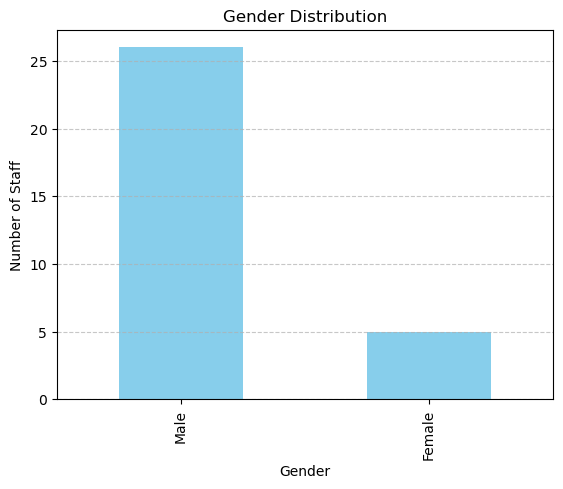

In [14]:
df_cleaned['GENDER'].value_counts().plot(kind='bar', color='skyblue', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Staff')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



### Qualification vs Job Grade

To explore the relationship between educational qualifications and job grading, a stacked bar chart was created using a crosstab:

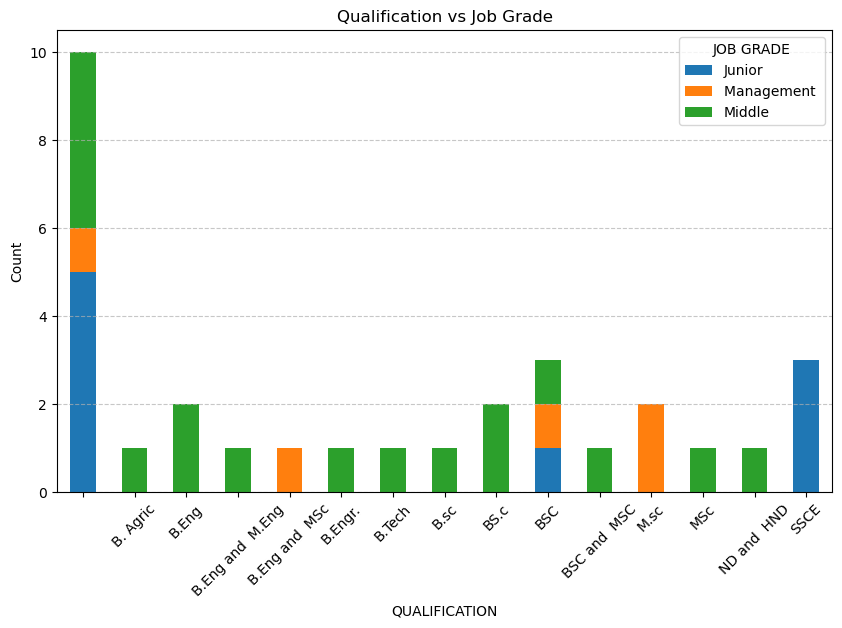

In [15]:
pd.crosstab(df_cleaned['QUALIFICATION'], df_cleaned['JOB GRADE']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Qualification vs Job Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


###  Length of Service Distribution

A histogram was created to visualise how long staff members have been with the organisation. This helps HR understand experience distribution and identify retention trends.

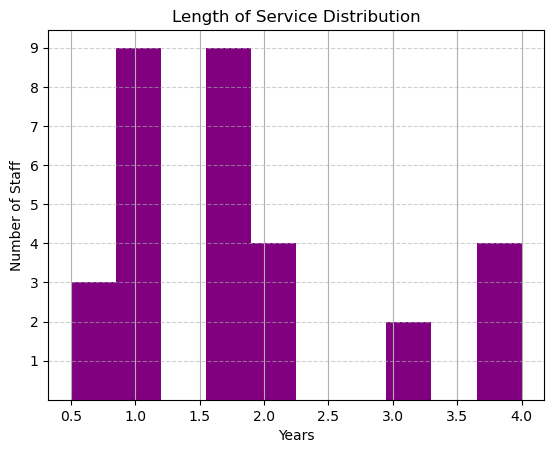

In [ ]:

df_cleaned['LENGTH OF SERVICE'] = df_cleaned['LENGTH OF SERVICE'].replace('<1', 0.5)
df_cleaned['LENGTH OF SERVICE'] = df_cleaned['LENGTH OF SERVICE'].astype(float)

# Plot histogram
df_cleaned['LENGTH OF SERVICE'].hist(bins=10, color='purple')
plt.title('Length of Service Distribution')
plt.xlabel('Years')
plt.ylabel('Number of Staff')
plt.yticks(ticks=range(1, 10))  # Y-axis ticks from 1 to 9
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Grid on Y-axis
plt.show()


In [ ]:
# Print the columns of the cleaned DataFrame
print(df_cleaned.columns.tolist())


['STAFF ID NO', 'NAMES', 'GENDER', 'DESIGNATION', 'Confirmed Status', 'EMAIL ADDRESS', 'QUALIFICATION', 'SPECIALIZATION', 'JOB GRADE', 'LENGTH OF SERVICE', 'Promotion Eligibility', 'Promotion_History', 'Tenure_Current_Grade', 'Qualification_Level']


### Top 10 Designations by Staff Count (Across Confirmation Status)

To gain insights into workforce structure, a pie chart was created to visualise the top 10 most common designations within the organisation, aggregated across both confirmed and unconfirmed staff.

/tmp/ipykernel_14579/791879105.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



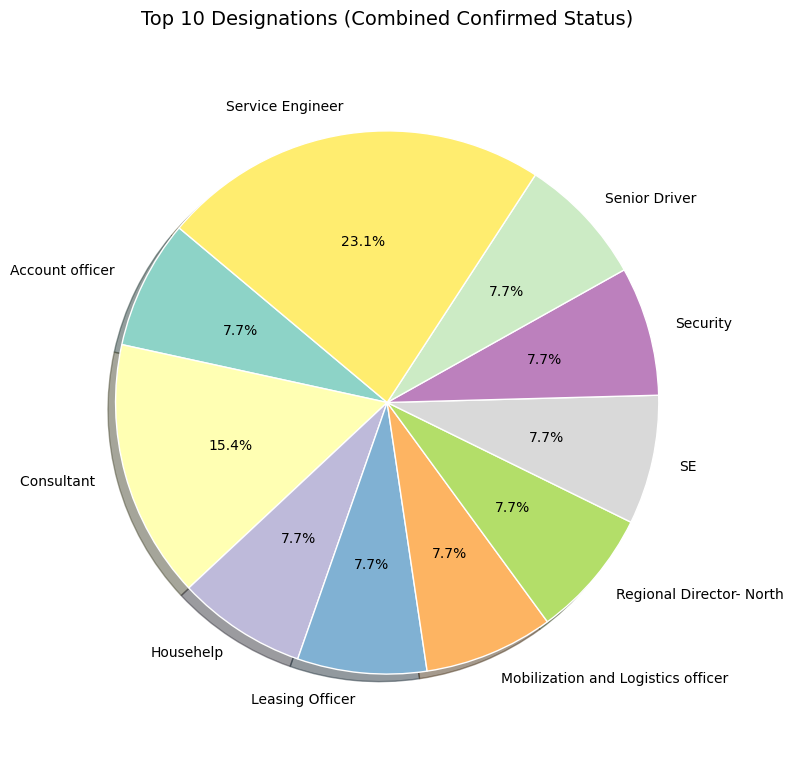

In [ ]:
# Group and aggregate
filtered_df = df_cleaned.groupby(['DESIGNATION', 'Confirmed Status']).size().reset_index(name='Count')
top_10_designations = filtered_df.groupby('DESIGNATION')['Count'].sum().sort_values(ascending=False).head(10).index
filtered_df = filtered_df[filtered_df['DESIGNATION'].isin(top_10_designations)]

# Sum across Confirmed Status for pie chart
summary = filtered_df.groupby('DESIGNATION')['Count'].sum()

# Generate 10 custom bright colors using colormap
cmap = cm.get_cmap('Set3', 10)   

colors = [cmap(i) for i in range(10)]

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    summary,
    labels=summary.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Improve label visibility
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title('Top 10 Designations (Combined Confirmed Status)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()


### Load Annual Staff Training Plan Data

In [209]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

import pandas as pd
staff_training_plan_df = pd.read_excel("ANNUAL STAFF TRAINING PLAN.xlsx", engine='openpyxl')

staff_training_plan_df.head()


,Unnamed: 0,,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,STAFF TRAINING PLAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,EMPLOYEE,DEPARTMENT/UNIT,DESIGNATION,NaN,TRAINING AREA,TARGET COMPLETION DATE,STATUS,DATE \nCOMPLETED,DATE(S) RETAKEN\nif required
3,NaN,Oluwatade Dada,Project,HoP,NaN,Project Management Professional -PMP,2022-03-01 00:00:00,Completed,2023-07-22 00:00:00,NaN
4,NaN,George Oche,Admin,HoA,NaN,Operational Excellence practices for work eff...,2022-05-01 00:00:00,NaN,NaN,NaN


In [20]:


df_training_cleaned = staff_training_plan_df.iloc[3:].copy()
df_training_cleaned.columns = staff_training_plan_df.iloc[2]

# Drop the old index
df_training_cleaned.reset_index(drop=True, inplace=True)
# Ensure the column names are properly stripped of leading/trailing whitespace
df_training_cleaned.columns = df_training_cleaned.columns.str.strip()
df_training_cleaned = df_training_cleaned.loc[:, df_training_cleaned.columns.notna()]
#df_training_cleaned = df_training_cleaned.drop(coldf_training_cleaned.set_index("ID", inplace=True)
#df_cleaned.set_index('S/No.', inplace=True)
df_training_cleaned.columns.name = None

df_training_cleaned.head(10)

,EMPLOYEE,DEPARTMENT/UNIT,DESIGNATION,TRAINING AREA,TARGET COMPLETION DATE,STATUS,DATE \nCOMPLETED,DATE(S) RETAKEN\nif required
0,Oluwatade Dada,Project,HoP,Project Management Professional -PMP,2022-03-01 00:00:00,Completed,2023-07-22 00:00:00,NaN
1,George Oche,Admin,HoA,Operational Excellence practices for work eff...,2022-05-01 00:00:00,NaN,NaN,NaN
2,Precious Idoko,Admin,HRM,Professional in HR international (PHRi) ...,2023-05-01 00:00:00,NaN,NaN,NaN
3,All Staff,NaN,NaN,1. Training in Marketing ...,2023-03-01 00:00:00,NaN,NaN,NaN
4,Matthew A. Adebisi,Product,TPP,"Investment, Financial and Business Risk Manage...",2022-04-01 00:00:00,NaN,NaN,NaN
5,Christopher Suberu,Project,DOP,Monitoring and Evaluation Strategies for proje...,2022-08-01 00:00:00,NaN,NaN,NaN
6,Ayoola Ayodeji,Product,BA,Business Analytics and Data Management/present...,2023-05-01 00:00:00,NaN,NaN,NaN
7,Andy Oga,Product,LHO,Fleet Management for Profitability,2023-06-01 00:00:00,NaN,NaN,NaN
8,Otti Deborah,Project,CMO,Contemporary Techniques for a Successful Recov...,2023-02-23 00:00:00,NaN,NaN,NaN
9,Temitope Adeyemi,"Logistics, Admin",L&D,Training in Logistics and supply chain management,2023-02-06 00:00:00,Completed,2023-02-09 00:00:00,NaN


In [ ]:
# printing columns of the cleaned DataFrame
df_training_cleaned.columns

Index(['EMPLOYEE', 'DEPARTMENT/UNIT', 'DESIGNATION', 'TRAINING AREA',
       'TARGET COMPLETION DATE', 'STATUS', 'DATE \nCOMPLETED',
       'DATE(S) RETAKEN\nif required'],
      dtype='object')

In [22]:
df_training_cleaned.shape

(10, 8)

In [23]:
df_training_cleaned.columns

Index(['EMPLOYEE', 'DEPARTMENT/UNIT', 'DESIGNATION', 'TRAINING AREA',
       'TARGET COMPLETION DATE', 'STATUS', 'DATE \nCOMPLETED',
       'DATE(S) RETAKEN\nif required'],
      dtype='object')

In [24]:
df_training_cleaned.isnull().sum()

EMPLOYEE                         0
DEPARTMENT/UNIT                  1
DESIGNATION                      1
TRAINING AREA                    0
TARGET COMPLETION DATE           0
STATUS                           8
DATE \nCOMPLETED                 8
DATE(S) RETAKEN\nif required    10
dtype: int64

In [25]:
df_training_cleaned = df_training_cleaned.drop(columns=["DATE(S) RETAKEN\nif required","DATE \nCOMPLETED","STATUS"])

### Heatmap: Training Areas by Department/Unit

This heatmap provides a visual overview of how different departments or units are distributed across various training areas, helping identify focus areas and potential training gaps.

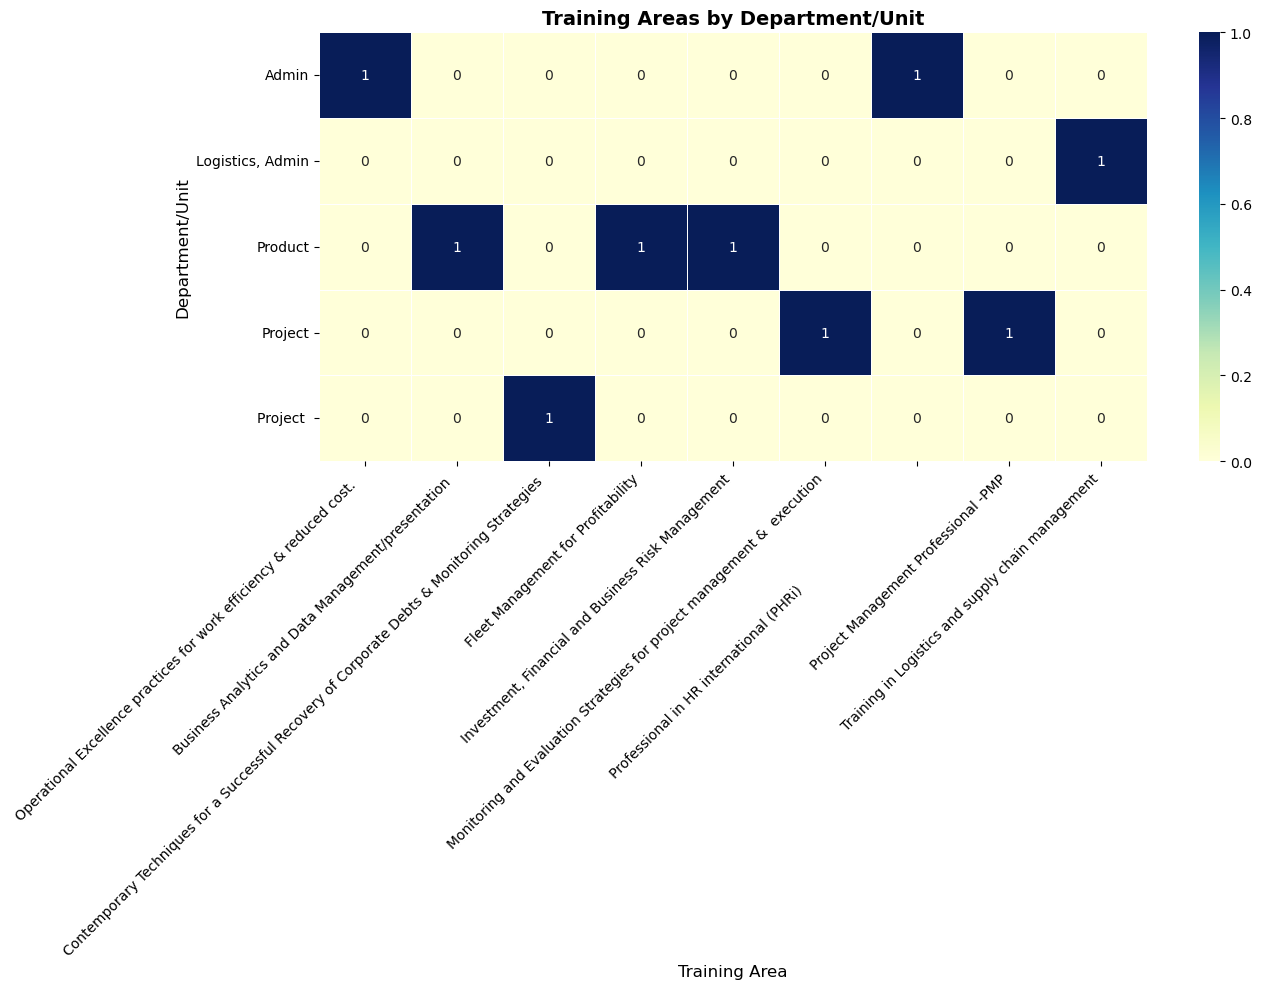

In [ ]:
# Create crosstab (frequency matrix)
heatmap_data = pd.crosstab(df_training_cleaned['DEPARTMENT/UNIT'], df_training_cleaned['TRAINING AREA'])

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)

plt.title('Training Areas by Department/Unit', fontsize=14, fontweight='bold')
plt.xlabel('Training Area', fontsize=12)
plt.ylabel('Department/Unit', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, fontsize=10)  # Ensure y labels are horizontal and readable

plt.tight_layout()
plt.subplots_adjust(left=0.25)  # Add space on the left if y labels are long
plt.show()


### Interactive Training Timeline by Employee

To visualise when each staff member is expected to complete training, an interactive Gantt-style timeline was generated using Plotly:

In [ ]:
# Copy and convert date
df_timeline = df_training_cleaned.copy()
df_timeline['TARGET COMPLETION DATE'] = pd.to_datetime(df_timeline['TARGET COMPLETION DATE'])

# Create dummy end date for visibility
df_timeline['End Date'] = df_timeline['TARGET COMPLETION DATE'] + pd.Timedelta(days=1)

# Count employees to scale chart height
num_employees = df_timeline['EMPLOYEE'].nunique()
chart_height = max(400, num_employees * 60)

# Plot
fig = px.timeline(
    df_timeline,
    x_start="TARGET COMPLETION DATE",
    x_end="End Date",
    y="EMPLOYEE",
    color="DEPARTMENT/UNIT",
    title='Training Timeline by Employee',
    labels={"DEPARTMENT/UNIT": "Department"}
)

fig.update_yaxes(autorange="reversed")
fig.update_layout(
    height=chart_height,
    margin=dict(l=150, r=50, t=50, b=50),
    font=dict(size=12)
)

fig.show()


###  Distribution of Training Areas

This pie chart visualises how training efforts are distributed across various thematic areas within the organisation's staff development program.

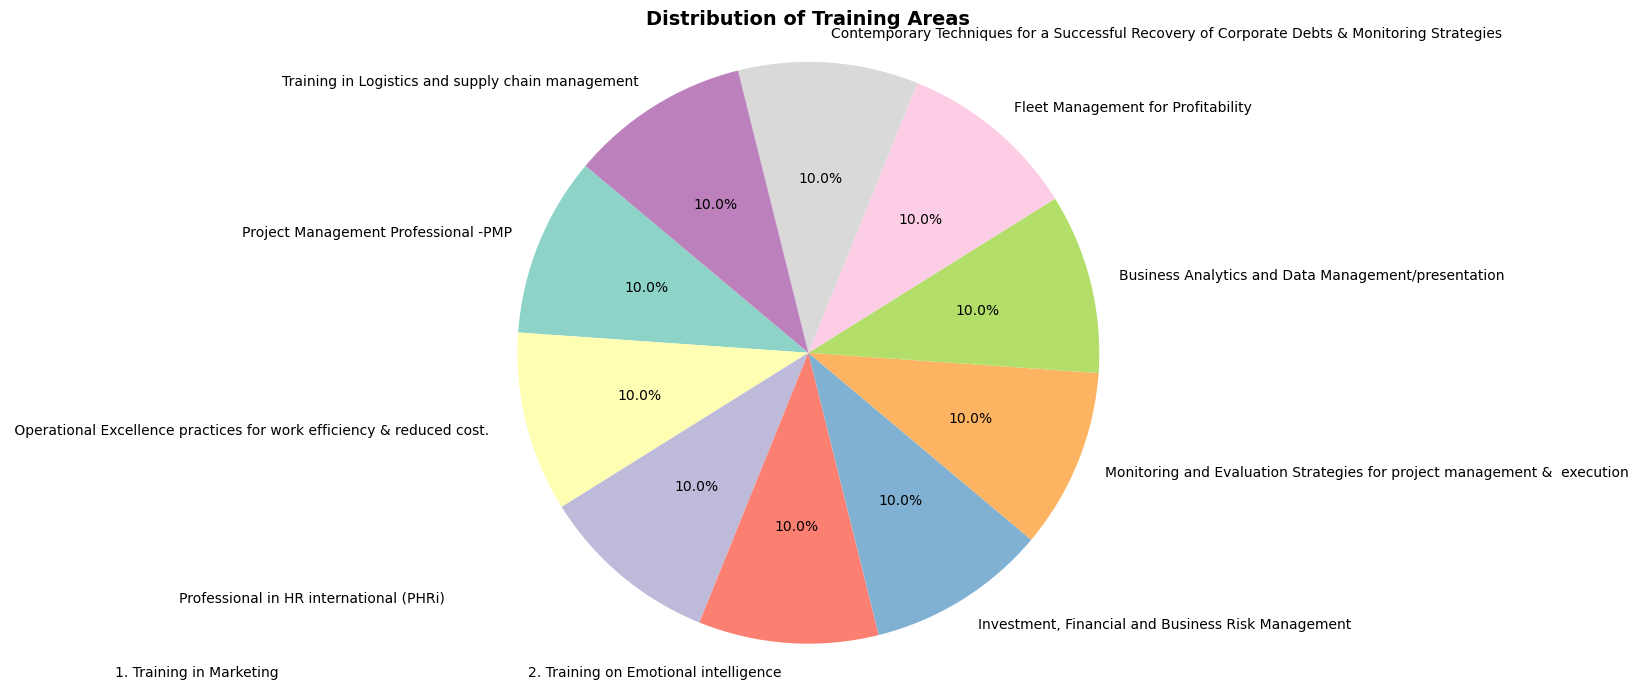

In [ ]:
# Count training areas
training_area_counts = df_training_cleaned['TRAINING AREA'].value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))  # Slightly larger
wedges, texts, autotexts = ax.pie(
    training_area_counts,
    labels=training_area_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3'),
    textprops=dict(color="black", fontsize=10)
)

# Make the title slightly larger
ax.set_title('Distribution of Training Areas', fontsize=14, fontweight='bold')

# Make pie chart a circle
ax.axis('equal')

# Add padding manually
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()


###  Load Payroll Data

The payroll file was imported to enable analysis of staff compensation and to support payroll segmentation modelling.

In [29]:
payroll_march_2022_df = pd.read_excel("Copy of NAMEL'S PAYROLL FOR MARCH 2022.xlsx", engine='openpyxl')

payroll_march_2022_df.head(14)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NIGERIA AGRICULTURAL MECHANIZATION AND EQUIPME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTHLY SALARY SCHEDULE FOR MAY 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,EMOLUMENTS,NaN,NaN,NaN,NaN,NaN,NaN,DEDUCTIONS,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
5,NaN,1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
6,NaN,2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,NaN,39924.43,200075.57
7,NaN,3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
8,NaN,4,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,10000,135250,8216.4,8297.54,NaN,NaN,16513.94,118736.06
9,NaN,6,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77


In [30]:
payroll_march_2022_df= payroll_march_2022_df.iloc[4:].reset_index(drop=True)
payroll_march_2022_df.columns = payroll_march_2022_df.iloc[0]   
payroll_march_2022_df = payroll_march_2022_df[1:].reset_index(drop=True)
valid_columns = payroll_march_2022_df.iloc[0].notna()
payroll_march_2022_df = payroll_march_2022_df.loc[:, valid_columns]

payroll_march_2022_df.columns = [str(col).strip() for col in payroll_march_2022_df.columns]
payroll_march_2022_df.columns.values[0] = "ID"
# Drop the first column by position (index 0)
payroll_march_2022_df = payroll_march_2022_df.iloc[:,1:]

payroll_march_2022_df.reset_index(drop=True, inplace=True)
payroll_march_2022_df.index = payroll_march_2022_df.index + 1
payroll_march_2022_df.head()

payroll_march_2022_df.head()


,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Gross pay,Pension 8%,PAYE,Total Deductions,Net Pay
1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,375000,24600,46943.47,71543.47,303456.53
2,Idoko Precious,HRM,120000,43200,33600,24000,19200,240000,15744,24180.43,39924.43,200075.57
3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,125000,8200,8270,16470,108530
4,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,135250,8216.4,8297.54,16513.94,118736.06
5,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,90000,5904,4437.23,10341.23,79658.77


In [31]:
payroll_may_2022_df = pd.read_excel("May 2022 Payroll.xlsx", engine='openpyxl')

payroll_may_2022_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NIGERIA AGRICULTURAL MECHANIZATION AND EQUIPME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTHLY SALARY SCHEDULE FOR MAY 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,EMOLUMENTS,NaN,NaN,NaN,NaN,NaN,NaN,DEDUCTIONS,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
5,NaN,1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
6,NaN,2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,NaN,39924.43,200075.57
7,NaN,3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
8,NaN,4,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,NaN,125250,8216.4,8297.54,NaN,NaN,16513.94,108736.06
9,NaN,6,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77


In [ ]:
# Drop first 4 rows (metadata rows)
payroll_may_2022_df = payroll_may_2022_df.iloc[4:].reset_index(drop=True)

# Set proper column names from the new first row
payroll_may_2022_df.columns = payroll_may_2022_df.iloc[0]
payroll_may_2022_df = payroll_may_2022_df[1:].reset_index(drop=True)

# Drop the unnamed column (first column which was all NaN)
payroll_may_2022_df.drop(columns=payroll_may_2022_df.columns[0], inplace=True)

# Rename the first column to "ID"
payroll_may_2022_df.rename(columns={payroll_may_2022_df.columns[0]: "ID"}, inplace=True)

# Clean column names (remove leading/trailing spaces)
payroll_may_2022_df.columns = [str(col).strip() for col in payroll_may_2022_df.columns]

# Set "ID" as the index
payroll_may_2022_df.set_index("ID", inplace=True)


# Show the cleaned DataFrame
payroll_may_2022_df.head()

,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
ID,,,,,,,,,,,,,,,
1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,NaN,39924.43,200075.57
3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
4,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,NaN,125250,8216.4,8297.54,NaN,NaN,16513.94,108736.06
6,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77


In [33]:
payroll_may_2022_df.isnull().sum()


NAMES                               18
DESIGNATION                         17
Basic                               22
Transport                           25
Housing                             24
Utility                             25
Dress                               19
Bonus                               54
Gross pay                           17
Pension 8%                          34
PAYE                                31
Loans/adv                           46
Surcharge/  absence/   penalties    53
Total Deductions                    21
Net Pay                             14
dtype: int64

In [34]:
payroll_july_2022_df = pd.read_excel("NAMEL'S PAYROLL FOR JULY 2022.xlsx", engine='openpyxl')

payroll_july_2022_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NIGERIA AGRICULTURAL MECHANIZATION AND EQUIPME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTHLY SALARY SCHEDULE FOR JULY 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,EMOLUMENTS,NaN,NaN,NaN,NaN,NaN,NaN,DEDUCTIONS,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
5,NaN,1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
6,NaN,2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,10000,49924.43,190075.57
7,NaN,3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
8,NaN,4,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77
9,NaN,5,Paramdi Solomon Abari,INALDS Desk Officer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77


In [ ]:
# Drop the first 4 metadata rows
payroll_july_2022_df = payroll_july_2022_df.iloc[4:].reset_index(drop=True)

# Set the new header from the first row after dropping
payroll_july_2022_df.columns = payroll_july_2022_df.iloc[0]
payroll_july_2022_df = payroll_july_2022_df[1:].reset_index(drop=True)

# Drop the first unnamed column (which is all NaN or irrelevant)
payroll_july_2022_df.drop(columns=payroll_july_2022_df.columns[0], inplace=True)

# Rename the first column (which should now contain the IDs) to "ID"
payroll_july_2022_df.rename(columns={payroll_july_2022_df.columns[0]: "ID"}, inplace=True)

# Strip whitespace from all column names
payroll_july_2022_df.columns = [str(col).strip() for col in payroll_july_2022_df.columns]

# Set "ID" as index
payroll_july_2022_df.set_index("ID", inplace=True)



# Optional: Display the cleaned DataFrame
payroll_july_2022_df.head()

,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
ID,,,,,,,,,,,,,,,
1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,10000,49924.43,190075.57
3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
4,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77
5,Paramdi Solomon Abari,INALDS Desk Officer,45000,12600,16200,9000,7200,NaN,90000,5904,4437.23,NaN,NaN,10341.23,79658.77


In [36]:
payroll_july_2023_df = pd.read_excel("Salary/NAMEL'S PAYROLL FOR JULY 2023.xlsx", engine='openpyxl')

payroll_july_2023_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NIGERIA AGRICULTURAL MECHANIZATION AND EQUIPME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTHLY SALARY SCHEDULE FOR JULY 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,EMOLUMENTS,NaN,NaN,NaN,NaN,NaN,NaN,DEDUCTIONS,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus/ Refund,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
5,NaN,1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
6,NaN,2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,10000,49924.43,190075.57
7,NaN,3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
8,NaN,4,Patience Douglas,Service Engineer,75000,21000,27000,15000,12000,NaN,150000,9840,11470.99,NaN,NaN,21310.99,128689.01
9,NaN,5,Paramdi Solomon Abari,INALDS Desk Officer,75000,21000,27000,15000,12000,NaN,150000,9840,11470.99,NaN,NaN,21310.99,128689.01


In [ ]:
# Drop metadata rows (first 4)
payroll_july_2023_df = payroll_july_2023_df.iloc[4:].reset_index(drop=True)

# Set new headers from the first remaining row
payroll_july_2023_df.columns = payroll_july_2023_df.iloc[0]
payroll_july_2023_df = payroll_july_2023_df[1:].reset_index(drop=True)

# Drop the first unnamed column (assumed to be an index or empty)
payroll_july_2023_df.drop(columns=payroll_july_2023_df.columns[0], inplace=True)

# Rename the first column to "ID"
payroll_july_2023_df.rename(columns={payroll_july_2023_df.columns[0]: "ID"}, inplace=True)

# Clean column names by stripping whitespace
payroll_july_2023_df.columns = [str(col).strip() for col in payroll_july_2023_df.columns]

# Set "ID" as the index
payroll_july_2023_df.set_index("ID", inplace=True)



# Final output
payroll_july_2023_df.head()


,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus/ Refund,Gross pay,Pension 8%,PAYE,Loans/adv,Surcharge/ absence/ penalties,Total Deductions,Net Pay
ID,,,,,,,,,,,,,,,
1,Dada -Oluwatade Adeniyi,HoP,187500,52500,67500,37500,30000,NaN,375000,24600,46943.47,NaN,NaN,71543.47,303456.53
2,Idoko Precious,HRM,120000,43200,33600,24000,19200,NaN,240000,15744,24180.43,NaN,10000,49924.43,190075.57
3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,NaN,125000,8200,8270,NaN,NaN,16470,108530
4,Patience Douglas,Service Engineer,75000,21000,27000,15000,12000,NaN,150000,9840,11470.99,NaN,NaN,21310.99,128689.01
5,Paramdi Solomon Abari,INALDS Desk Officer,75000,21000,27000,15000,12000,NaN,150000,9840,11470.99,NaN,NaN,21310.99,128689.01


In [38]:
payroll_july_2021_df = pd.read_excel("Salary/NAMEL'S PAYROLLJULY 2021.xlsx", engine='openpyxl')

payroll_july_2021_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NIGERIA AGRICULTURAL MECHANIZATION AND EQUIPME...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTHLY SALARY SCHEDULE FOR THE MONTH ENDED 3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,EMOLUMENTS,NaN,NaN,NaN,NaN,DEDUCTIONS,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Pension Employer 10%,Gross pay,Total Pension,PAYE,Loans/adv,Surcharge/absence/penalties,Total Deductions,Net Pay
5,NaN,1,Adeleke Adekanmbi,TPP,120000,33600,43200,24000,19200,19680,259680,35424,24180.43,10416.666667,NaN,70021.096667,189658.903333
6,NaN,2,Dada -Oluwatade Adeniyi,HPC,120000,33600,43200,24000,19200,19680,259680,35424,24180.43,NaN,NaN,59604.43,200075.57
7,NaN,3,Idoko Precious,HRM,75000,21000,27000,15000,12000,12300,162300,22140,11097.07,NaN,NaN,33237.07,129062.93
8,NaN,4,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,10250,135250,18450,8270,NaN,NaN,26720,108530
9,NaN,5,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,10270.5,135520.5,18486.9,8297.54,NaN,NaN,26784.44,108736.06


In [ ]:
# Drop metadata rows (first 4)
payroll_july_2021_df = payroll_july_2021_df.iloc[4:].reset_index(drop=True)

# Set new headers from the first remaining row
payroll_july_2021_df.columns = payroll_july_2021_df.iloc[0]
payroll_july_2021_df = payroll_july_2021_df[1:].reset_index(drop=True)

# Drop the first unnamed column
payroll_july_2021_df.drop(columns=payroll_july_2021_df.columns[0], inplace=True)

# Rename the first column to "ID"
payroll_july_2021_df.rename(columns={payroll_july_2021_df.columns[0]: "ID"}, inplace=True)

# Clean up column names
payroll_july_2021_df.columns = [str(col).strip() for col in payroll_july_2021_df.columns]

# Set "ID" as index
payroll_july_2021_df.set_index("ID", inplace=True)



# View cleaned DataFrame
payroll_july_2021_df.head()


,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Pension Employer 10%,Gross pay,Total Pension,PAYE,Loans/adv,Surcharge/absence/penalties,Total Deductions,Net Pay
ID,,,,,,,,,,,,,,,
1,Adeleke Adekanmbi,TPP,120000,33600,43200,24000,19200,19680,259680,35424,24180.43,10416.666667,NaN,70021.096667,189658.903333
2,Dada -Oluwatade Adeniyi,HPC,120000,33600,43200,24000,19200,19680,259680,35424,24180.43,NaN,NaN,59604.43,200075.57
3,Idoko Precious,HRM,75000,21000,27000,15000,12000,12300,162300,22140,11097.07,NaN,NaN,33237.07,129062.93
4,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,10250,135250,18450,8270,NaN,NaN,26720,108530
5,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,10270.5,135520.5,18486.9,8297.54,NaN,NaN,26784.44,108736.06


In [40]:
# Print columns of each dataframe for comparison
print(payroll_march_2022_df.columns)
print(payroll_may_2022_df.columns)
print(payroll_july_2021_df.columns)
print(payroll_july_2022_df.columns)
print(payroll_july_2023_df.columns)


Index(['NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Housing', 'Utility',
       'Dress', 'Gross pay', 'Pension 8%', 'PAYE', 'Total Deductions',
       'Net Pay'],
      dtype='object')
Index(['NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Housing', 'Utility',
       'Dress', 'Bonus', 'Gross pay', 'Pension 8%', 'PAYE', 'Loans/adv',
       'Surcharge/  absence/   penalties', 'Total Deductions', 'Net Pay'],
      dtype='object')
Index(['NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Housing', 'Utility',
       'Dress', 'Pension Employer 10%', 'Gross pay', 'Total Pension', 'PAYE',
       'Loans/adv', 'Surcharge/absence/penalties', 'Total Deductions',
       'Net Pay'],
      dtype='object')
Index(['NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Housing', 'Utility',
       'Dress', 'Bonus', 'Gross pay', 'Pension 8%', 'PAYE', 'Loans/adv',
       'Surcharge/  absence/   penalties', 'Total Deductions', 'Net Pay'],
      dtype='object')
Index(['NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Hous

In [41]:
standard_columns = [
    'NAMES', 'DESIGNATION', 'Basic', 'Transport', 'Housing', 'Utility', 'Dress',
    'Bonus', 'Gross pay', 'Pension', 'PAYE', 'Loans/adv',
    'Surcharge/absence/penalties', 'Total Deductions', 'Net Pay'
]


In [42]:
def standardize_payroll(df, period, col_renames={}):
    # Rename as needed
    df = df.rename(columns=col_renames)
    df.columns = [str(col).strip() for col in df.columns]

    # ✅ Drop duplicate columns using correct alignment
    df = df.loc[:, ~pd.Index(df.columns).duplicated(keep='first')]

    # Create unified 'Pension'
    if 'Pension 8%' in df.columns:
        df['Pension'] = df['Pension 8%']
    elif 'Total Pension' in df.columns:
        df['Pension'] = df['Total Pension']
    elif 'Pension Employer 10%' in df.columns:
        df['Pension'] = df['Pension Employer 10%']
    else:
        df['Pension'] = 0

    # Create unified 'Bonus'
    if 'Bonus' not in df.columns:
        if 'Bonus/ Refund' in df.columns:
            df['Bonus'] = df['Bonus/ Refund']
        else:
            df['Bonus'] = 0

    # Unified 'Surcharge/absence/penalties'
    if 'Surcharge/absence/penalties' not in df.columns:
        if 'Surcharge/  absence/   penalties' in df.columns:
            df['Surcharge/absence/penalties'] = df['Surcharge/  absence/   penalties']
        else:
            df['Surcharge/absence/penalties'] = 0

    # Ensure Loans/adv
    if 'Loans/adv' not in df.columns:
        df['Loans/adv'] = 0

    # Fill all missing standard columns
    for col in standard_columns:
        if col not in df.columns:
            df[col] = 0

    # Filter to standard columns
    df = df[standard_columns]

    # Add period
    df['Period'] = period

    return df.reset_index(drop=True)


In [43]:
july_2021_cleaned = standardize_payroll(payroll_july_2021_df, "July 2021", {
    "Pension Employer 10%": "Pension Employer 10%",
    "Total Pension": "Total Pension"
})

july_2022_cleaned = standardize_payroll(payroll_july_2022_df, "July 2022", {
    "Pension 8%": "Pension 8%"
})

july_2023_cleaned = standardize_payroll(payroll_july_2023_df, "July 2023", {
    "Pension 8%": "Pension 8%"
})


In [44]:
combined_payroll_df = pd.concat([
    july_2021_cleaned,
    july_2022_cleaned,
    july_2023_cleaned
], ignore_index=True)


In [45]:
print(combined_payroll_df['Period'].unique())
combined_payroll_df.head(50)

['July 2021' 'July 2022' 'July 2023']


,NAMES,DESIGNATION,Basic,Transport,Housing,Utility,Dress,Bonus,Gross pay,Pension,PAYE,Loans/adv,Surcharge/absence/penalties,Total Deductions,Net Pay,Period
0,Adeleke Adekanmbi,TPP,120000,33600,43200,24000,19200,0,259680,35424,24180.43,10416.666667,NaN,70021.096667,189658.903333,July 2021
1,Dada -Oluwatade Adeniyi,HPC,120000,33600,43200,24000,19200,0,259680,35424,24180.43,NaN,NaN,59604.43,200075.57,July 2021
2,Idoko Precious,HRM,75000,21000,27000,15000,12000,0,162300,22140,11097.07,NaN,NaN,33237.07,129062.93,July 2021
3,Engr. Kelechi Alfred,Field Engineer,62500,17500.0,22500,12500,10000,0,135250,18450,8270,NaN,NaN,26720,108530,July 2021
4,Ali Ismaila Gbatigbi,Service Engineer,62625,17535,22545,12525,10020,0,135520.5,18486.9,8297.54,NaN,NaN,26784.44,108736.06,July 2021
5,Ifeoma M . Abawii,AO,45200,12656,16272,9040,7232,0,97812.8,13343.04,4469.54,NaN,NaN,17812.58,80000.22,July 2021
6,Patience Douglas,Service Engineer,45000,12600,16200,9000,7200,0,97380,13284,4437.23,NaN,NaN,17721.23,79658.77,July 2021
7,Matthew A. Adebisi,Desk Officer,51300,14364,18468,10260,8208,0,111013.2,15143.76,5802.42,NaN,NaN,20946.18,90067.02,July 2021
8,Paramdi Solomon Abari,INALDS Desk Officer,45000,12600,16200,9000,7200,0,97380,13284,4437.23,NaN,NaN,17721.23,79658.77,July 2021
9,Pius Ibrahim Sumaila,ICTA,45000,12600,16200,9000,7200,0,97380,13284,4437.23,12500,NaN,30221.23,67158.77,July 2021


In [46]:
combined_payroll_df.shape

(164, 16)

In [47]:
combined_payroll_df.isna().sum()

NAMES                           48
DESIGNATION                     45
Basic                           70
Transport                       79
Housing                         76
Utility                         79
Dress                           66
Bonus                          112
Gross pay                       39
Pension                        101
PAYE                            93
Loans/adv                      138
Surcharge/absence/penalties    154
Total Deductions                71
Net Pay                         44
Period                           0
dtype: int64

In [48]:
deduction_columns = ['Pension', 'PAYE', 'Loans/adv', 'Surcharge/absence/penalties']
combined_payroll_df[deduction_columns] = combined_payroll_df[deduction_columns].fillna(0)


/tmp/ipykernel_14579/3605860209.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [49]:
combined_payroll_df['Bonus'] = combined_payroll_df['Bonus'].fillna(0)


/tmp/ipykernel_14579/3667356083.py:1: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
import pandas as pd

# Define relevant columns
salary_components = ['Basic', 'Transport', 'Housing', 'Utility', 'Dress', 'Bonus']
deduction_components = ['Pension', 'PAYE', 'Loans/adv', 'Surcharge/absence/penalties']

#  Convert all to numeric, coerce bad data to NaN 
for col in salary_components + deduction_components:
    combined_payroll_df[col] = pd.to_numeric(combined_payroll_df[col], errors='coerce')

# Fill NaNs with 0 (assume missing salary/deduction = 0)
combined_payroll_df[salary_components + deduction_components] = combined_payroll_df[salary_components + deduction_components].fillna(0)

#  Recalculate key fields 
combined_payroll_df['Gross pay'] = combined_payroll_df[salary_components].sum(axis=1)
combined_payroll_df['Total Deductions'] = combined_payroll_df[deduction_components].sum(axis=1)
combined_payroll_df['Net Pay'] = combined_payroll_df['Gross pay'] - combined_payroll_df['Total Deductions']

# Drop rows with missing critical identity fields 
combined_payroll_df.dropna(subset=['NAMES', 'DESIGNATION', 'Period'], inplace=True)

# Reset index after cleaning 
combined_payroll_df.reset_index(drop=True, inplace=True)

# Check for remaining missing values 
print("Remaining missing values:")
print(combined_payroll_df.isna().sum())


Remaining missing values:
NAMES                          0
DESIGNATION                    0
Basic                          0
Transport                      0
Housing                        0
Utility                        0
Dress                          0
Bonus                          0
Gross pay                      0
Pension                        0
PAYE                           0
Loans/adv                      0
Surcharge/absence/penalties    0
Total Deductions               0
Net Pay                        0
Period                         0
dtype: int64


In [51]:
combined_payroll_df.dropna(subset=['NAMES', 'DESIGNATION'], inplace=True)


#### 1. Time Series Analysis of Payroll Components Across Periods
#
This line chart illustrates the aggregate trends in Gross Pay, Net Pay and Total Deductions
across multiple payroll periods. Monitoring these trends is critical for understanding the
temporal dynamics of employee remuneration and associated costs, which informs budgeting
and strategic human resource planning.
#
The visualisation highlights potential seasonality, anomalies or sustained changes in payroll expenses.

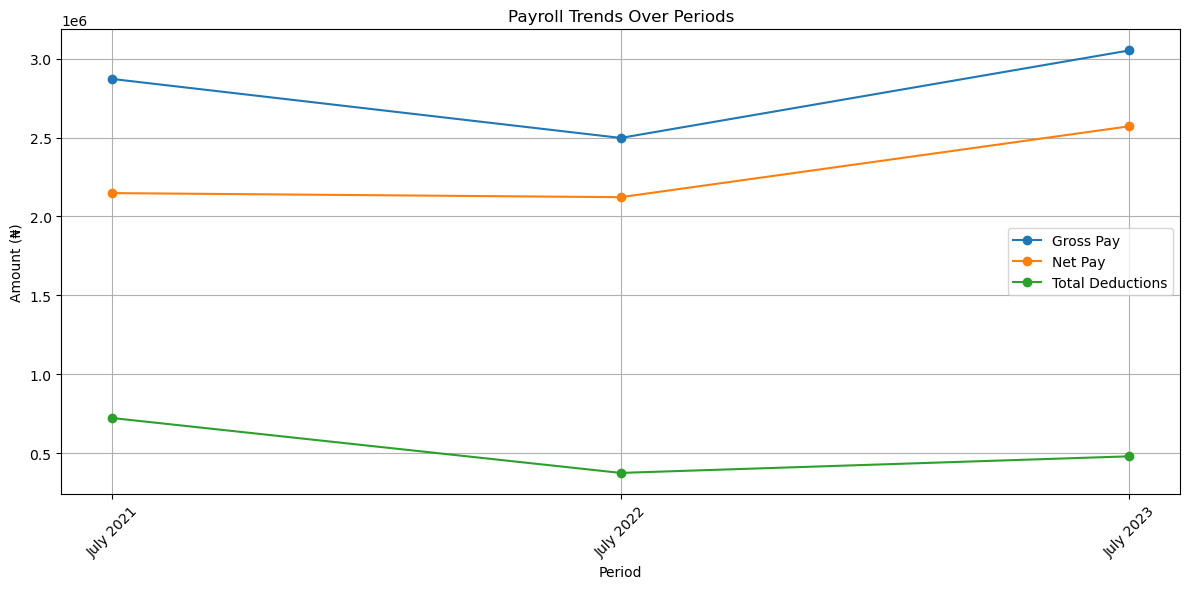

In [52]:
# Aggregate sums by Period
time_data = combined_payroll_df.groupby('Period').agg({
    'Gross pay': 'sum',
    'Net Pay': 'sum',
    'Total Deductions': 'sum'
}).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(time_data.index, time_data['Gross pay'], marker='o', label='Gross Pay')
plt.plot(time_data.index, time_data['Net Pay'], marker='o', label='Net Pay')
plt.plot(time_data.index, time_data['Total Deductions'], marker='o', label='Total Deductions')

plt.title('Payroll Trends Over Periods')
plt.xlabel('Period')
plt.ylabel('Amount (₦)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Heatmap Depicting Average Net Pay by Designation and Period
#
This heatmap provides a comparative overview of average net remuneration across various job roles
and time periods. The visualisation aids in identifying disparities or shifts in compensation by designation,
thereby supporting data-driven human capital management and compensation benchmarking.

/tmp/ipykernel_14579/1329787083.py:6: FutureWarning:

The provided callable <function mean at 0x7f437c3e9260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



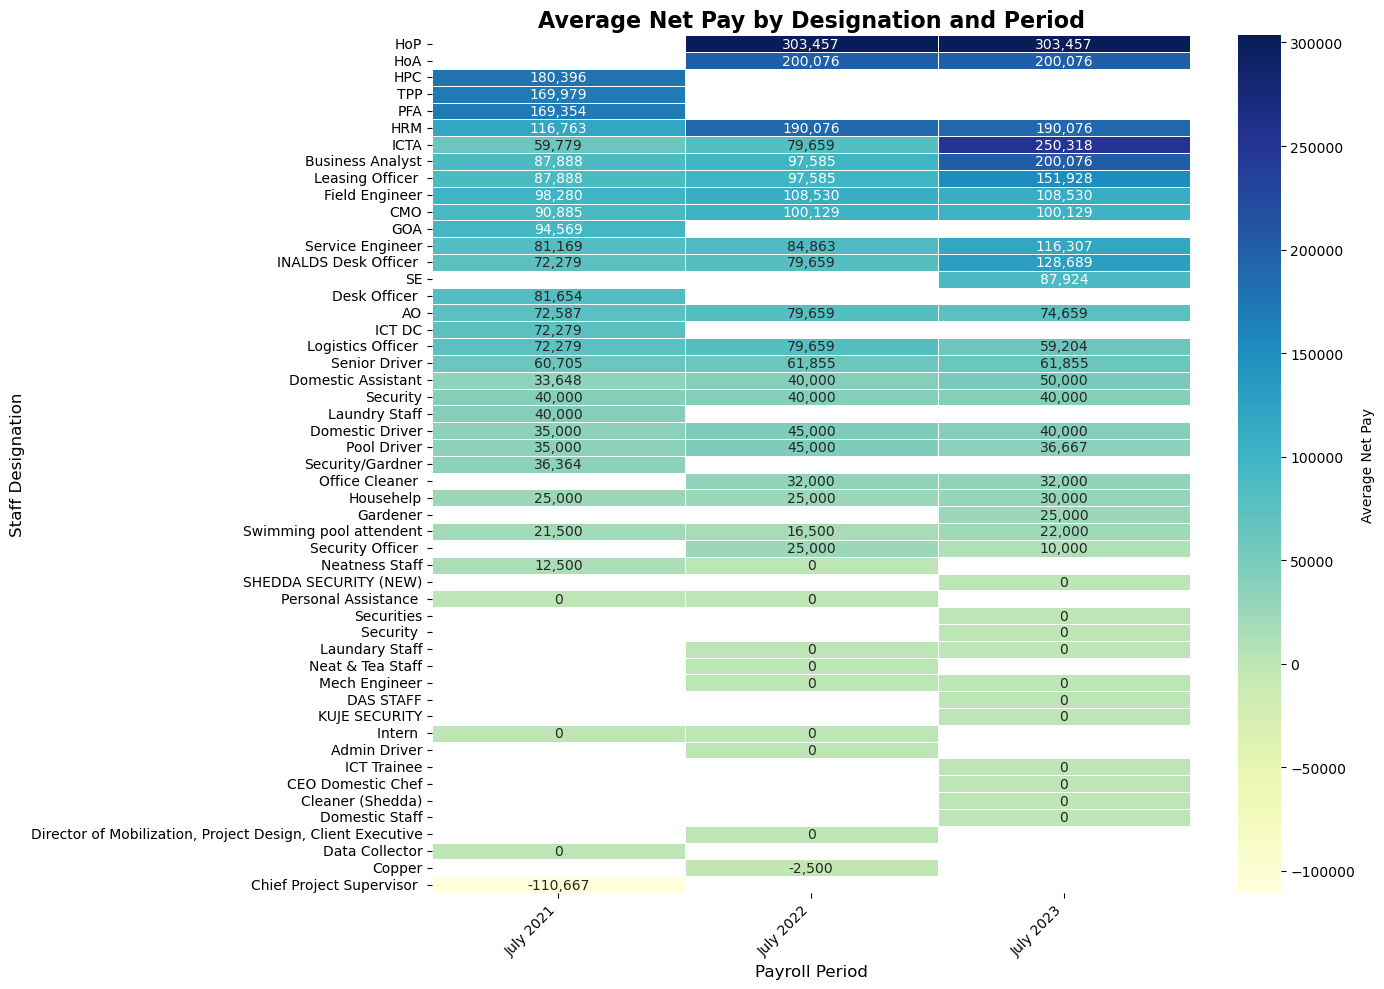

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pivot table with average Net Pay
heatmap_data = combined_payroll_df.pivot_table(
    index='DESIGNATION', 
    columns='Period', 
    values='Net Pay', 
    aggfunc=np.mean
)

# Sort designations by overall average pay
designation_order = heatmap_data.mean(axis=1).sort_values(ascending=False).index
heatmap_data = heatmap_data.loc[designation_order]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=",.0f",  # Comma for thousands, no decimals
    cmap='YlGnBu',
    linewidths=.5,
    cbar_kws={'label': 'Average Net Pay'},
)

plt.title('Average Net Pay by Designation and Period', fontsize=16, fontweight='bold')
plt.xlabel('Payroll Period', fontsize=12)
plt.ylabel('Staff Designation', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate Periods for clarity
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### 3. Scatter Plot of Gross Pay Versus Net Pay with Deduction Magnitude and Period Differentiation
#
This scatter plot visualises the relationship between gross and net pay, with marker size indicating
the total deductions and marker colour denoting payroll periods. This multidimensional view facilitates
analysis of payroll efficiency and deduction impact across time, supporting predictive insights on remuneration adjustments.

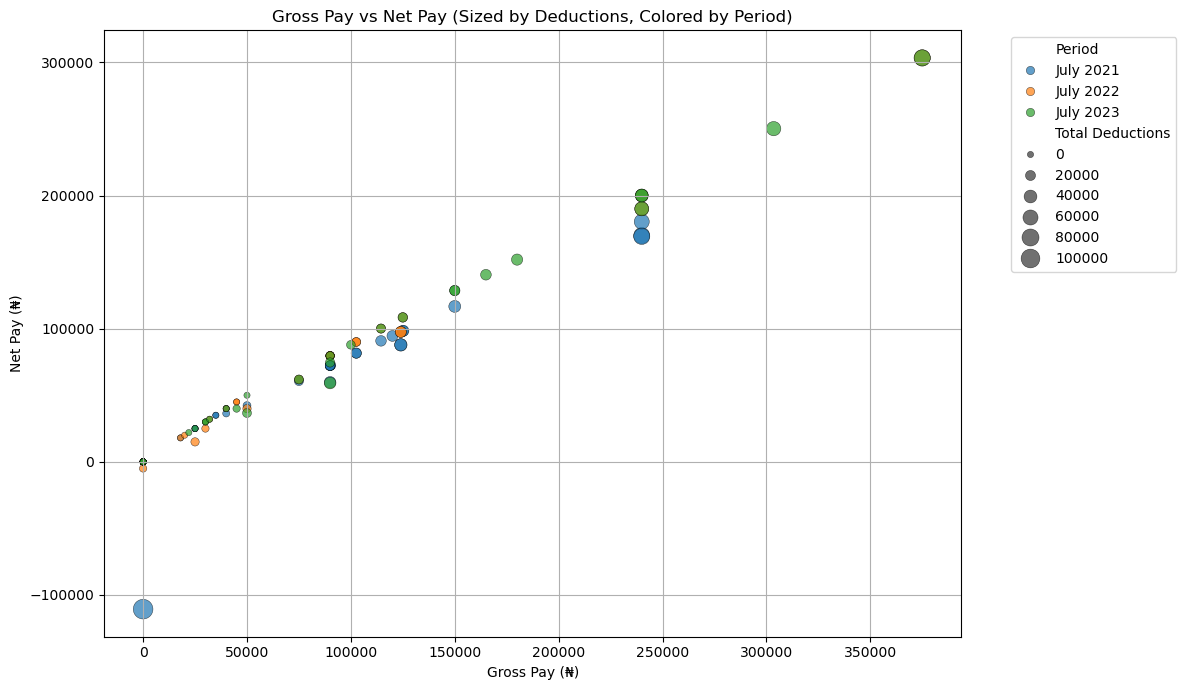

In [54]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=combined_payroll_df,
    x='Gross pay',
    y='Net Pay',
    hue='Period',
    size='Total Deductions',
    sizes=(20, 200),
    palette='tab10',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Gross Pay vs Net Pay (Sized by Deductions, Colored by Period)')
plt.xlabel('Gross Pay (₦)')
plt.ylabel('Net Pay (₦)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 4. Boxplot Analysis of Net Pay Distributions Across Payroll Periods
#
Boxplots illustrate the spread, median and outliers in net pay distributions for each payroll period.
This helps detect anomalies, wage disparities, and changes over time that are essential for ensuring pay equity
and informing remuneration policies.

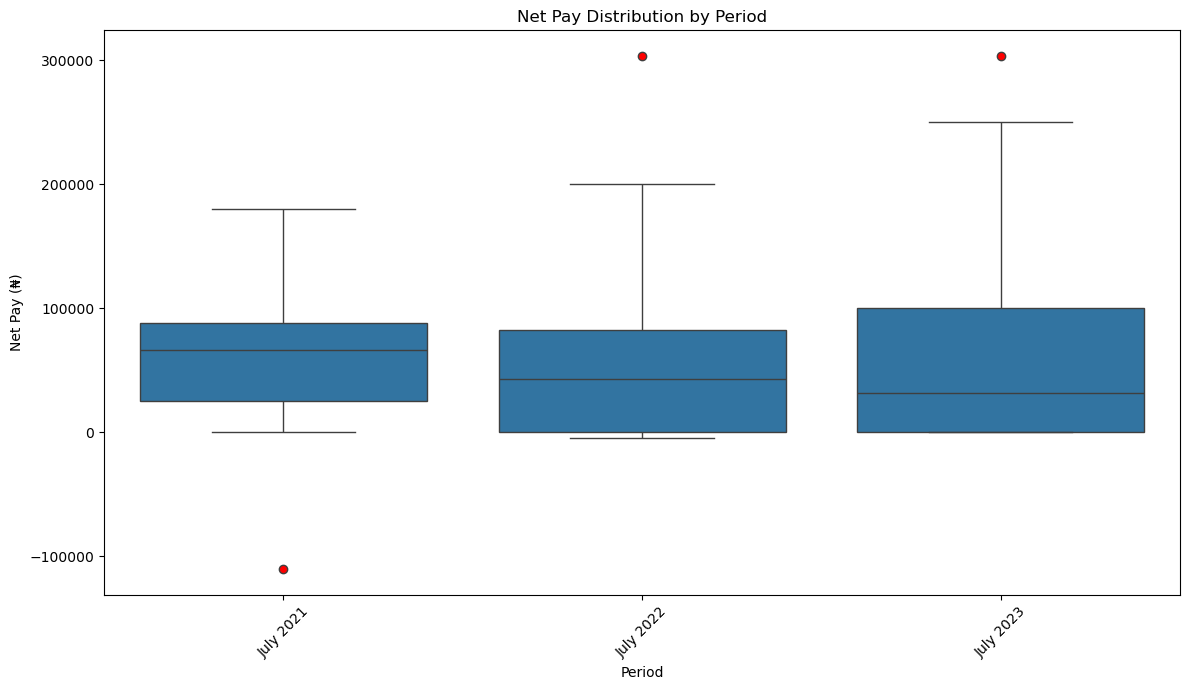

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Draw boxplot with default colors, but specify outlier color as red
sns.boxplot(
    data=combined_payroll_df, 
    x='Period', 
    y='Net Pay',
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
)

plt.title('Net Pay Distribution by Period')
plt.xlabel('Period')
plt.ylabel('Net Pay (₦)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 5. Correlation Matrix of Payroll Components
#
This heatmap displays pairwise Pearson correlations among salary components, deductions and net pay.
Understanding these interrelationships is critical for feature engineering in predictive models
and uncovering systemic patterns in payroll dynamics.

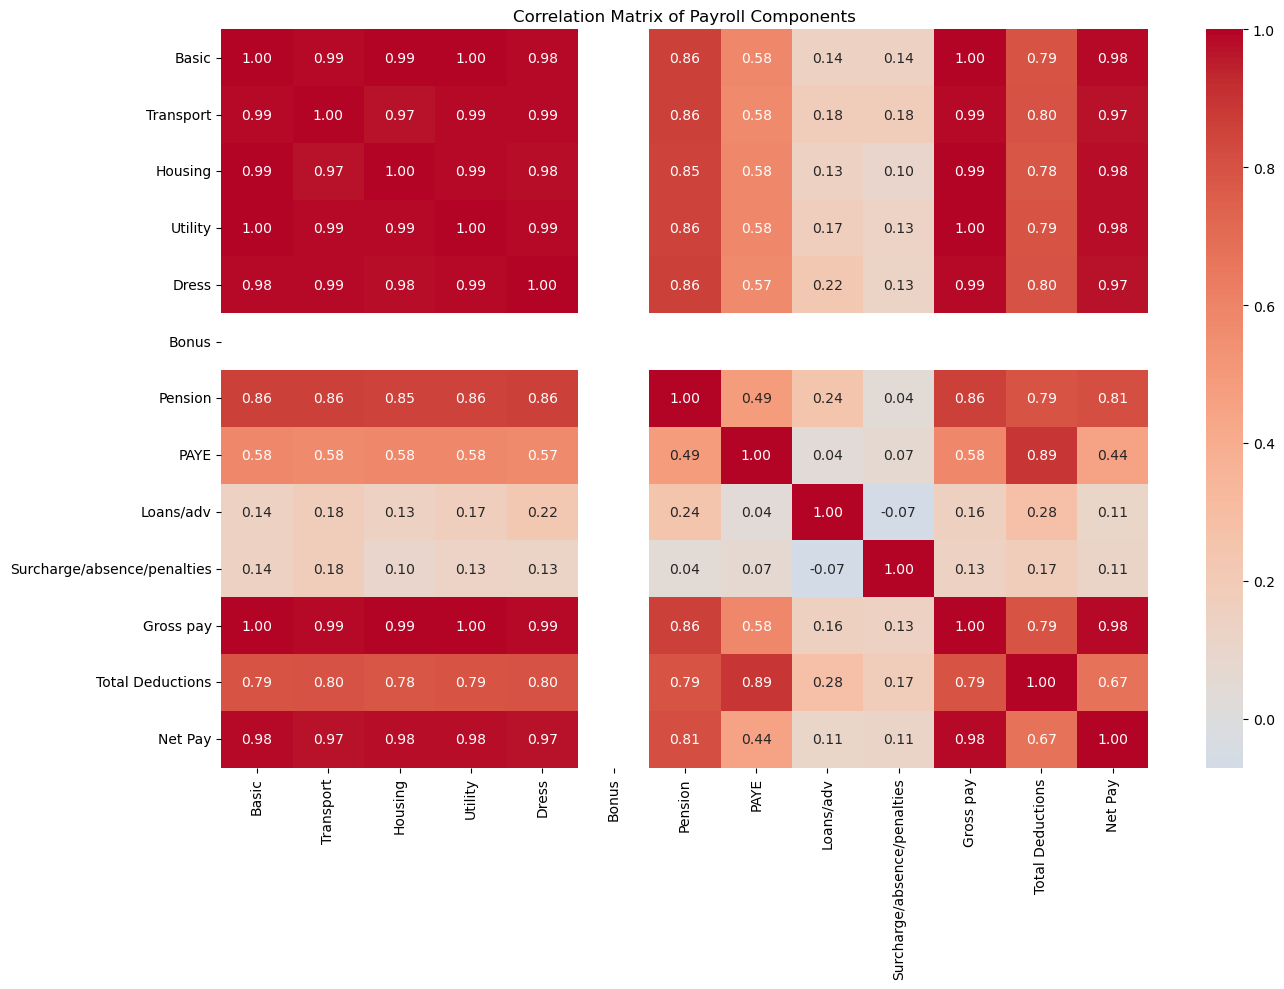

In [56]:
pay_components = ['Basic', 'Transport', 'Housing', 'Utility', 'Dress', 'Bonus',
                  'Pension', 'PAYE', 'Loans/adv', 'Surcharge/absence/penalties',
                  'Gross pay', 'Total Deductions', 'Net Pay']

corr = combined_payroll_df[pay_components].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Payroll Components')
plt.tight_layout()
plt.show()


#### 6. Stacked Area Chart Illustrating Trends in Deduction Components Over Time
#
This stacked area chart shows the cumulative and individual contributions of different deduction categories
across payroll periods. It enables stakeholders to pinpoint major deduction drivers and assess their evolution,
facilitating targeted cost control and policy formulation.

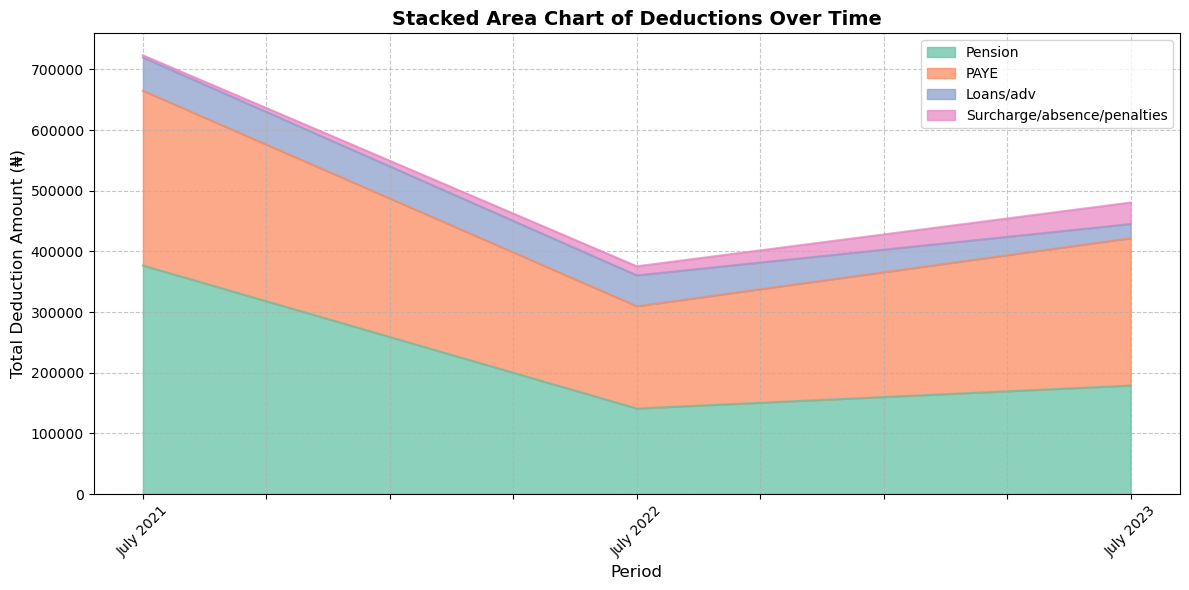

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

deductions = ['Pension', 'PAYE', 'Loans/adv', 'Surcharge/absence/penalties']

deduction_trends = combined_payroll_df.groupby('Period')[deductions].sum().sort_index()

# Use professional colors from seaborn's Set2 palette
colors = sns.color_palette("Set2", n_colors=len(deductions))

ax = deduction_trends.plot(
    kind='area', 
    stacked=True, 
    figsize=(12, 6), 
    color=colors, 
    alpha=0.75
)

plt.title('Stacked Area Chart of Deductions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Total Deduction Amount (₦)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity
plt.tight_layout()
plt.show()



#### 7. Longitudinal Analysis of Net Pay for Selected Employees
#
This line plot tracks the net pay of key employees across different payroll periods.
This longitudinal perspective aids in identifying trends such as salary growth, stagnation,
or decline at the individual level, enabling personalised interventions and workforce planning.

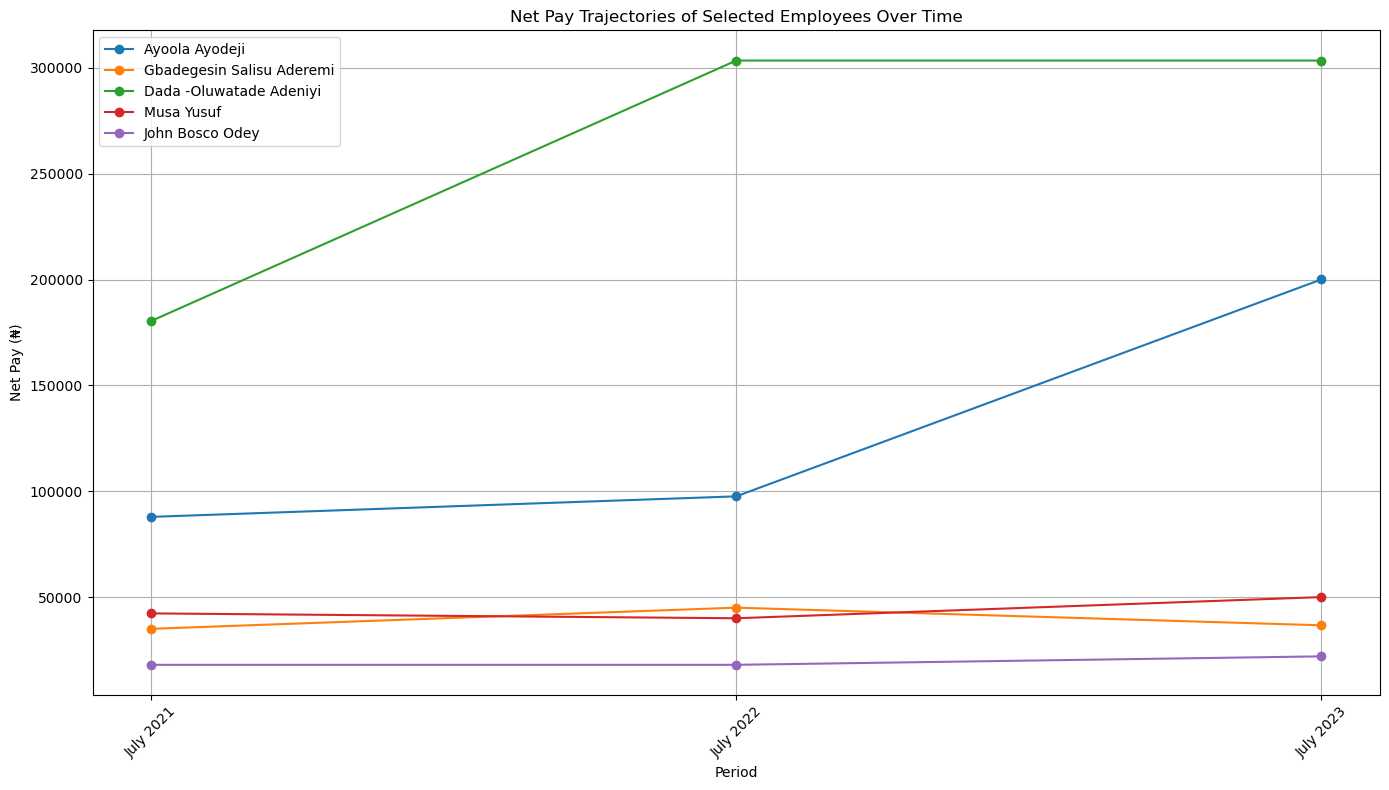

In [58]:
selected_employees = combined_payroll_df['NAMES'].value_counts().index[:5]  # Top 5 employees with most records

plt.figure(figsize=(14, 8))

for name in selected_employees:
    emp_data = combined_payroll_df[combined_payroll_df['NAMES'] == name]
    plt.plot(emp_data['Period'], emp_data['Net Pay'], marker='o', label=name)

plt.title('Net Pay Trajectories of Selected Employees Over Time')
plt.xlabel('Period')
plt.ylabel('Net Pay (₦)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Load Staff Probation Appraisal Data

The staff appraisal records were loaded to assess employee performance and support predictive modelling for HR decisions (e.g., promotion eligibility, performance classification).

In [59]:
Appraisal_1_df = pd.read_excel("Appraisal/Copy of RESULT SHEET FOR STAFF PROBOTIOBAL APPRAISAL.xlsx", engine='openpyxl')

Appraisal_1_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,RESULT SHEET FOR STAFF PROBATIONAL APPRAISAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name of Employee,Job Title,Rank,Effective date of Appointment in NAMEL,Percentage Score,Performance rating,Comment/Recommendation by Supervisor,Comments by HR,CE's Remark
2,Christopher Suberu,Service Engineer -2,Middle Level,2020-12-01 00:00:00,0.89,Excellent,The staff has performed satisfactory during th...,The staff has good prospects. Relevant trainin...,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deborah Chinasa Otti,Credit Mobilization Officer,Middle Level,2020-12-01 00:00:00,0.66,Satisfactiory,Training is recommended for the staff to perfo...,"The staff is commited and very puntual, but ha...",NaN
5,Ayoola Ayodeji Ifeoluwa,Bussiness Analyst,Middle Level,2020-02-01 00:00:00,0.88,Excellent,He has demostrated consistent understanding of...,His integration process was fast. He easily un...,NaN
6,Ogibo Andy Oga,Leasing & Hiring Officer,Middle Level,2020-02-01 00:00:00,0.82,Excellent,The employee has improved so well in the under...,The staff has demostrated good knowlegde of hi...,NaN
7,Oluwamayowa Adebisi,Service Engineer -4,Middle Level,2021-07-01 00:00:00,0.56,Satisfactiory,If the Staff will be confirmed considering his...,Constant reorienation on his expected delivera...,NaN
8,Gbadegesin Aderemi Salisu,Office Driver,Junior Level,2020-08-01 00:00:00,0.72,Very Good,The staff is hardworking and committed. I reco...,The staff discharges his duties professional. ...,NaN


In [60]:
Appraisal_2_df = pd.read_excel("Appraisal/Review of Engagement Terms.xlsx", engine='openpyxl')

Appraisal_2_df.head(10)


,,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,REVIEW OF ENGAGEMENT TERMS,NaN
2,NaN,NaN,NaN
3,NaN,Name,MADAM GRACE PETER
4,NaN,Designation,Office Cleaner
5,NaN,Recommendations,Slight salary review which is dependant on new...
6,NaN,Justification,The Volume of work considering the number of o...
7,NaN,NaN,She has been dedicated and hardworking over th...
8,NaN,NaN,NaN
9,NaN,Name,MS. PATIENCE DOUGLAS


### Account officer recruitment Dataset

In [61]:
Shortlisted_candidate_df = pd.read_excel("Account Officer recruitment/Shortlisted Candidtates for Account Officer role.xlsx", engine='openpyxl')
Shortlisted_candidate_df.head(10)

,Unnamed: 0,Shortlisted Candidates for the Account Officer Role,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,S/N,Name,Gender,Qualification,NaN,Background,NaN,Class of Degree,NaN,Years of experience,NaN,Location,Relevant certification,NaN,Phone No
2,NaN,1,Odutola Rachael Abimbola,Female,"BSc, Msc",NaN,BSc Economics,NaN,NaN,NaN,5 years,NaN,"Lugbe, Abuja",ICAN,NaN,7035341930
3,NaN,NaN,NaN,NaN,NaN,NaN,MSc Banking &Finance,NaN,NaN,NaN,NaN,NaN,NaN,ACA,NaN,8082293584
4,NaN,2,Aruoma David Kelechukwu,Male,Bsc,NaN,Accounting,NaN,2.1,NaN,7 years,NaN,"Lugbe, Abuja",ICAN (In view),NaN,7035388014
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3,Olaniyi Ayomikun Samson,Male,BSc,NaN,Accounting,NaN,2.1,NaN,2 years,NaN,"Garki, Abuja",ICAN (In view),NaN,9123650761
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4,Sheku Sandra Lyop,Female,BSc,NaN,Accounting,NaN,2.1,NaN,3 years,NaN,"Apo, Abuja",ICAN (In view),NaN,8149432146


In [62]:

# Set correct column headers from row 1 (index 1)
Shortlisted_candidate_df.columns = Shortlisted_candidate_df.iloc[1]
Shortlisted_candidate_df = Shortlisted_candidate_df.iloc[2:].reset_index(drop=True)

Shortlisted_candidate_df = Shortlisted_candidate_df.loc[:, Shortlisted_candidate_df.columns.notna()]

Shortlisted_candidate_df.columns.name = None  # Remove the name of the columns index

#Dropping the S?N column
#Shortlisted_candidate_df.drop(columns=['S/N'], inplace=True, errors='ignore')
# Drop rows that are still all NaN
Shortlisted_candidate_df.dropna(how='all', inplace=True)

#Drop row where s/n is NaN
Shortlisted_candidate_df = Shortlisted_candidate_df.dropna(subset=['S/N'])

# Use S/N as index
Shortlisted_candidate_df.set_index('S/N', inplace=True)



Shortlisted_candidate_df.head(10)

,Name,Gender,Qualification,Background,Class of Degree,Years of experience,Location,Relevant certification,Phone No
S/N,,,,,,,,,
1,Odutola Rachael Abimbola,Female,"BSc, Msc",BSc Economics,NaN,5 years,"Lugbe, Abuja",ICAN,7035341930
2,Aruoma David Kelechukwu,Male,Bsc,Accounting,2.1,7 years,"Lugbe, Abuja",ICAN (In view),7035388014
3,Olaniyi Ayomikun Samson,Male,BSc,Accounting,2.1,2 years,"Garki, Abuja",ICAN (In view),9123650761
4,Sheku Sandra Lyop,Female,BSc,Accounting,2.1,3 years,"Apo, Abuja",ICAN (In view),8149432146


In [63]:
Cleaned_interview_report_df = pd.read_csv("Cleaned_Interview_Report.csv")
Cleaned_interview_report_df.head(60)

,Candidate Name,Criteria,Max Score,Abiodun Idowu,Oche George,Precious,Average Score,Comments
0,Racheal Abimbola Oodusote,Composition and Maturity,10,10,6,8,7.33,"The candidate is matured enough, well organize..."
1,Racheal Abimbola Oodusote,Organization,10,10,5,7,6.00,NaN
2,Racheal Abimbola Oodusote,Communication & Expression,10,10,7,8,7.33,NaN
3,Racheal Abimbola Oodusote,Professional Awareness,20,20,12,8,10.00,NaN
4,Racheal Abimbola Oodusote,ICT Skill,10,10,5,8,6.67,NaN
5,Racheal Abimbola Oodusote,Job Related Experience,20,20,10,8,9.33,NaN
6,Racheal Abimbola Oodusote,Literacy/Numeracy Knowledge,10,10,6,8,7.33,NaN
7,Racheal Abimbola Oodusote,Initiative/Proactiveness,10,10,6,7,7.00,NaN
8,Racheal Abimbola Oodusote,Total,100,100,57,62,61.00,NaN
9,Ayomikun Samson Olaniyi,Composition and Maturity,10,4,8,6,6.00,"The candidate, though an accounting graduate h..."


In [64]:

# Load the original budget data
budget_df = pd.read_excel("Account Officer recruitment/Budget for Account Officer role.xlsx", engine='openpyxl') 

# Drop fully empty rows
budget_df.dropna(how='all', inplace=True)

# Reset index
budget_df.reset_index(drop=True, inplace=True)

# Assign temporary column names
budget_df.columns = ['Drop', 'Item', 'Amount']

# Drop the first column ('Drop') which is just NaNs or irrelevant
budget_df.drop(columns='Drop', inplace=True)

# Strip whitespace from the 'Item' column
budget_df['Item'] = budget_df['Item'].astype(str).str.strip()

# Drop rows where Item is 'Budget' or 'Earnings'
budget_df = budget_df[~budget_df['Item'].isin(['Budget', 'Earnings'])]

# Reset index again
budget_df.reset_index(drop=True, inplace=True)

# Display the cleaned dataframe
print(budget_df)



                Item     Amount
0              Basic   56200.00
1          Transport   20385.00
2            Housing   15855.00
3            Utility   12000.00
4              Dress   10060.00
5          Gross Pay  114500.00
6  Net Pay after tax  100129.18


### Merging Staff Records with Payroll Data

To build a unified view of each employee, staff demographic data was merged with payroll records based on the employee names:

In [109]:
merged_df = pd.merge(df_cleaned, combined_payroll_df, on='NAMES', how='outer', suffixes=('_staff', '_payroll'))
merged_df.head(60)

,STAFF ID NO,NAMES,GENDER,DESIGNATION_staff,Confirmed Status,EMAIL ADDRESS,QUALIFICATION,SPECIALIZATION,JOB GRADE,LENGTH OF SERVICE,...,Dress,Bonus,Gross pay,Pension,PAYE,Loans/adv,Surcharge/absence/penalties,Total Deductions,Net Pay,Period
0,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,,,Junior,1.840909,...,2800.0,0.0,35000.0,0.00,0.000000,0.000000,0.00,0.000000,35000.000000,July 2021
1,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,,,Junior,1.840909,...,3600.0,0.0,45000.0,0.00,0.000000,0.000000,0.00,0.000000,45000.000000,July 2022
2,1801-014,Abdulkareem Abubakar,Male,Domestic Driver,Confirmed,NaN,,,Junior,1.840909,...,3600.0,0.0,45000.0,0.00,0.000000,0.000000,5000.00,5000.000000,40000.000000,July 2023
3,NaN,Adama Solomon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,July 2023
4,1801-051,Adebisi Oluwamayowa,Male,Service Engineer,Pending,oluwamayowa@namel.com.ng,B.sc,,Middle,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Adeleke Adekanmbi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,0.0,240000.0,35424.00,24180.430000,10416.666667,0.00,70021.096667,169978.903333,July 2021
6,NaN,Adeyemi Temitope Isaac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7200.0,0.0,90000.0,13284.00,4437.230000,0.000000,0.00,17721.230000,72278.770000,July 2021
7,NaN,Adeyemi Temitope Isaac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7200.0,0.0,90000.0,5904.00,4437.230000,0.000000,0.00,10341.230000,79658.770000,July 2022
8,NaN,Adeyemi Temitope Isaac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7200.0,0.0,90000.0,5904.00,4437.230000,0.000000,20454.50,30795.730000,59204.270000,July 2023
9,NaN,Afolabi Christopher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24280.0,0.0,303500.0,19909.60,33272.410000,0.000000,0.00,53182.010000,250317.990000,July 2023


In [96]:
merged_df.isnull().sum()

STAFF ID NO                     0
NAMES                           0
GENDER                          0
DESIGNATION_x                   0
Confirmed Status                0
EMAIL ADDRESS                  20
QUALIFICATION                   0
SPECIALIZATION                  0
JOB GRADE                       0
LENGTH OF SERVICE               0
Promotion Eligibility           0
Promotion_History               0
Tenure_Current_Grade            0
Qualification_Level             0
DESIGNATION_y                   0
Basic                           0
Transport                       0
Housing                         0
Utility                         0
Dress                           0
Bonus                           0
Gross pay                       0
Pension                         0
PAYE                            0
Loans/adv                       0
Surcharge/absence/penalties     0
Total Deductions                0
Net Pay                         0
Period                          0
dtype: int64

In [97]:
merged_df.columns

Index(['STAFF ID NO', 'NAMES', 'GENDER', 'DESIGNATION_x', 'Confirmed Status',
       'EMAIL ADDRESS', 'QUALIFICATION', 'SPECIALIZATION', 'JOB GRADE',
       'LENGTH OF SERVICE', 'Promotion Eligibility', 'Promotion_History',
       'Tenure_Current_Grade', 'Qualification_Level', 'DESIGNATION_y', 'Basic',
       'Transport', 'Housing', 'Utility', 'Dress', 'Bonus', 'Gross pay',
       'Pension', 'PAYE', 'Loans/adv', 'Surcharge/absence/penalties',
       'Total Deductions', 'Net Pay', 'Period'],
      dtype='object')

### Splitting the dataset for model training and testing and training the model

### Random Forest Classifier
Preprocessing: One-hot encoding (categorical), Standard scaling (numerical)

Data split: 80% train, 20% test

Metrics reported: Accuracy, classification report, confusion matrix, ROC curve with AUC

Model Type: RandomForestClassifier
Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       566
           1       1.00      0.45      0.62       101

    accuracy                           0.92       667
   macro avg       0.95      0.72      0.78       667
weighted avg       0.92      0.92      0.90       667

Confusion Matrix:
[[566   0]
 [ 56  45]]


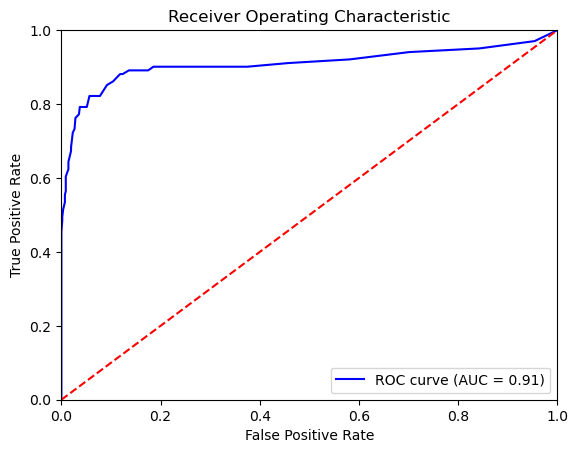

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prepare the features and target variable
X = merged_df.drop(columns=['Promotion Eligibility'])

# Convert target variable to binary
y = merged_df['Promotion Eligibility'].map({'True.': 1, 'False.': 0})

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a ColumnTransformer to handle categorical and numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),  # One-hot encode categorical columns
        ('num', StandardScaler(), numerical_cols)     # Standard scale numerical columns
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Splitting the datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(x_train, y_train)

# Print the type of model being used
model_type = pipeline.named_steps['classifier'].__class__.__name__
print(f"Model Type: {model_type}")

# Making predictions
y_pred_rf = pipeline.predict(x_test)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred_rf)

accuracy = pipeline.score(x_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:\n", classification_rep)

# Optionally, print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC AUC and plot ROC curve
y_scores = pipeline.predict_proba(x_test)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression
Preprocessing: One-hot encoding (categorical), Standard scaling (numerical)

Data split: 80% train, 20% test

Metrics reported: Accuracy, classification report, confusion matrix, ROC curve with AUC

Model Name: LogisticRegression
Model Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.19      0.28       101

    accuracy                           0.86       667
   macro avg       0.72      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix:
[[552  14]
 [ 82  19]]


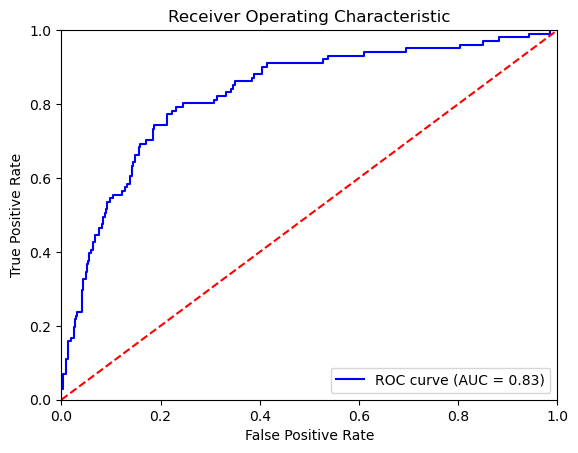

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Preparing the features and target variable
X = merged_df.drop(columns=['Promotion Eligibility'])

# Convert targeting variable to binary
y = merged_df['Promotion Eligibility'].map({'True.': 1, 'False.': 0})

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Creating a ColumnTransformer to handle categorical and numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),  # One-hot encode categorical columns
        ('num', StandardScaler(), numerical_cols)     # Standard scale numerical columns
    ],
    remainder='passthrough'  # Keeping the remaining columns as they are
)

# Creating a pipeline with Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Print the model name
model_name = model.named_steps['classifier'].__class__.__name__
print(f"Model Name: {model_name}")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Optionally, print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC AUC and plot ROC curve
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### XGBoost Classifier
Preprocessing: One-hot encoding (categorical), Standard scaling (numerical)

Data split: 80% train, 20% test

Metrics reported: Accuracy, classification report, confusion matrix, ROC curve with AUC

Original DataFrame shape: (3333, 21)
Unique values in 'Promotion Eligibility': ['False.' 'True.']
Missing values in 'Promotion Eligibility': 0
Model Name: XGBClassifier
Model Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       566
           1       0.93      0.77      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.95       667

Confusion Matrix:
[[560   6]
 [ 23  78]]


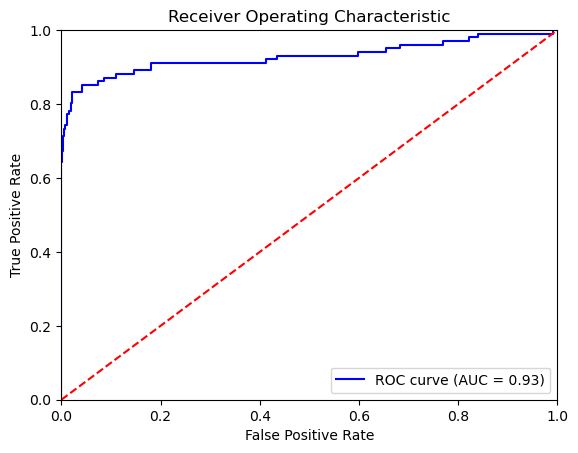

In [218]:
# Assuming merged_df is your DataFrame

# Check the shape of the original DataFrame
print(f"Original DataFrame shape: {merged_df.shape}")

# Check unique values in the target variable
unique_values = merged_df['Promotion Eligibility'].unique()
print(f"Unique values in 'Promotion Eligibility': {unique_values}")

# Prepare the features and target variable
X = merged_df.drop(columns=['Promotion Eligibility'])

# Clean the target variable by stripping trailing characters and converting to numeric
y = merged_df['Promotion Eligibility'].str.strip().str.rstrip('.').map({'True': 1, 'False': 0})

# Check for missing values in the target variable
missing_values_count = y.isna().sum()
print(f"Missing values in 'Promotion Eligibility': {missing_values_count}")

# Drop rows where the target variable is NaN
X = X[y.notna()]
y = y[y.notna()]

# Check if we still have data after dropping NaNs
if X.empty or y.empty:
    raise ValueError("No data available after removing rows with NaN values in the target variable.")

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Create a pipeline with XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import warnings
import xgboost
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

model_name = xgb.__class__.__name__
print(f"Model Name: {model_name}")

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy = xgb.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate and print the classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

# Optionally, print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC AUC and plot ROC curve
y_scores = xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### CV-to-Job Matching 
 This  compares candidate CV sections to job descriptions using semantic similarity via sentence-transformer embeddings. It helps identify which parts of a CV best align with specific job roles — useful for HR automation, candidate screening, and career advising.

### Features
- Text preprocessing: Cleans and lemmatizes text using spaCy.

- Semantic embeddings: Uses SentenceTransformer (all-MiniLM-L6-v2) for encoding.

- Cosine similarity: Measures closeness between CV and job description vectors.

- Top section ranking: Outputs top-matching CV sections per job.

### Data Flow Diagram for System Architecture

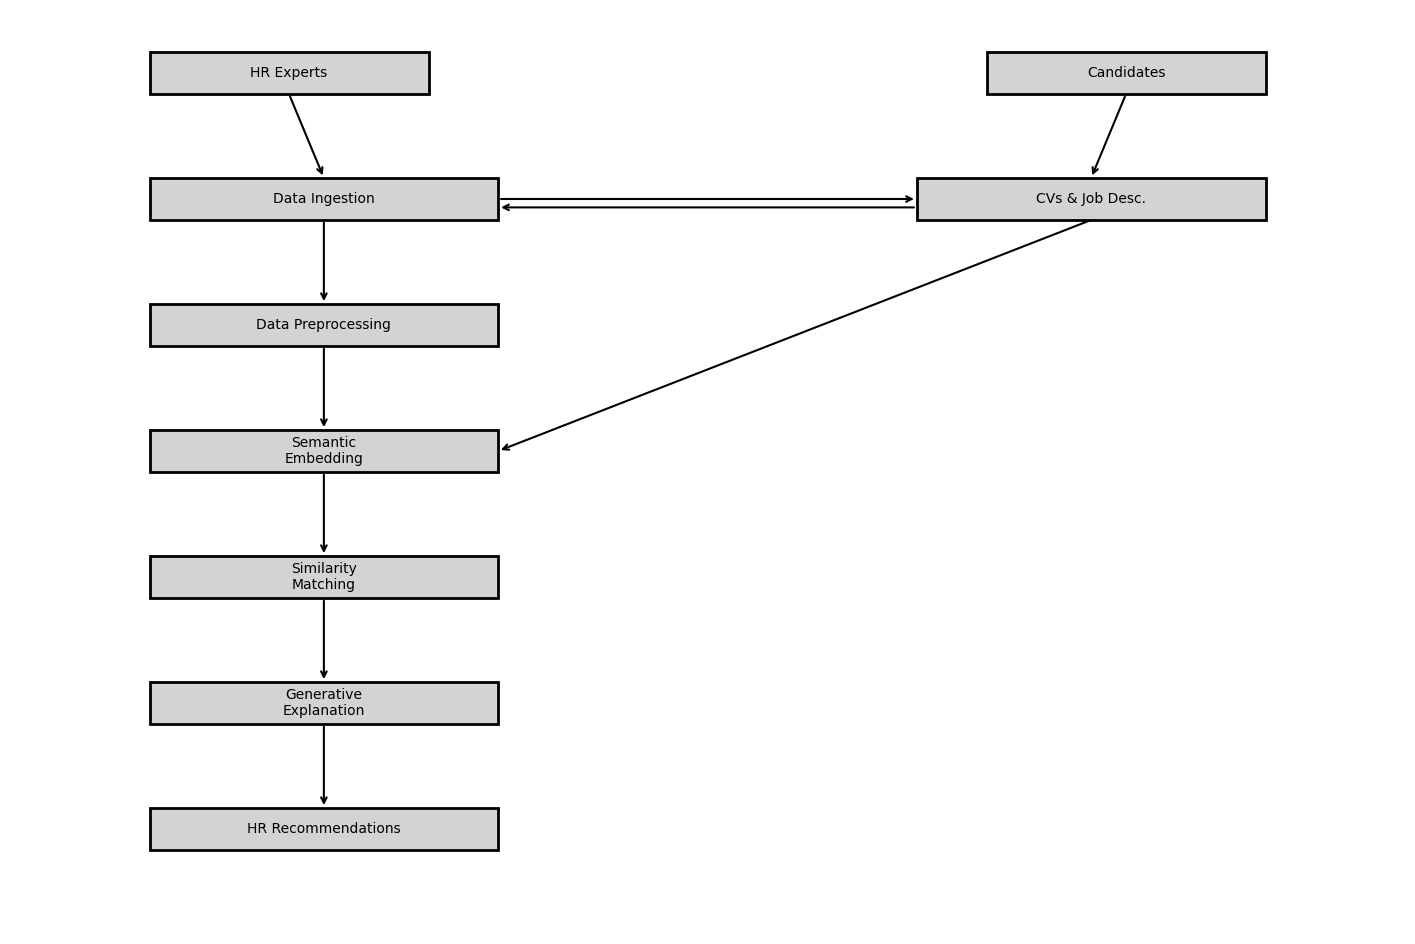

In [226]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_xlim(0, 20)
ax.set_ylim(0, 22)
ax.axis('off')

# Helper function to draw a box with text
def draw_box(x, y, w, h, text):
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black', facecolor='lightgray')
    ax.add_patch(rect)
    ax.text(x + w / 2, y + h / 2, text, ha='center', va='center', fontsize=10, wrap=True)

# Draw entities
draw_box(2, 20, 4, 1, "HR Experts")
draw_box(14, 20, 4, 1, "Candidates")

# First process layer
draw_box(2, 17, 5, 1, "Data Ingestion")
draw_box(13, 17, 5, 1, "CVs & Job Desc.")

# Second process layer
draw_box(2, 14, 5, 1, "Data Preprocessing")

# Third process layer
draw_box(2, 11, 5, 1, "Semantic\nEmbedding")

# Fourth process layer
draw_box(2, 8, 5, 1, "Similarity\nMatching")

# Fifth process layer
draw_box(2, 5, 5, 1, "Generative\nExplanation")

# Final output
draw_box(2, 2, 5, 1, "HR Recommendations")

# Draw arrows
def draw_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Arrows from top entities
draw_arrow(4, 20, 4.5, 18)        # HR Experts to Data Ingestion
draw_arrow(16, 20, 15.5, 18)      # Candidates to CVs & Job Desc.

# Data Ingestion ↔ CVs & Job Desc.
draw_arrow(7, 17.5, 13, 17.5)     # Ingestion → CVs
draw_arrow(13, 17.3, 7, 17.3)     # CVs → Ingestion

# Downstream processes
draw_arrow(4.5, 17, 4.5, 15)      # Ingestion to Preprocessing
draw_arrow(4.5, 14, 4.5, 12)      # Preprocessing to Embedding
draw_arrow(4.5, 11, 4.5, 9)       # Embedding to Matching
draw_arrow(4.5, 8, 4.5, 6)        # Matching to Explanation
draw_arrow(4.5, 5, 4.5, 3)        # Explanation to Recommendations

# Arrow from CVs & Job Desc. to Semantic Embedding
draw_arrow(15.5, 17, 7, 11.5)

plt.show()


### Job matching process code using the Sentence transformer

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
# Imports
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util
from openai import OpenAI
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Ensure required NLTK data
nltk.download('stopwords')

In [16]:

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialise OpenAI client (new API)
client = OpenAI(api_key="xai-FqOTrJ86WNgQX5odZfl7qvDJYIVaUpl3ImyjX8FsdrQQDgkCpOSrM8zrKWBCQyJEgOzys9dA1u3WfoP0") 

# Text cleaning and lemmatisation
def preprocess_text(text):
    doc = nlp(str(text))
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# GPT-3.5-turbo explanation function (free tier)
def generate_explanation(candidate, job_description):
    prompt = f"Explain why the following candidate is a good fit:\n\nCandidate: {candidate}\n\nJob: {job_description}"
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # switched to free-tier compatible model
        messages=[
            {"role": "system", "content": "You are an HR assistant who explains CV-to-job matches clearly."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

# === Load and preprocess data ===
cvs = pd.read_csv('AYOMIKUN_CV.csv')  # Columns: ['Section', 'Content']
jobs = pd.read_csv('job_descriptions.csv')  # Columns: ['JobTitle', 'Description']

# Preprocess text fields
cvs['cleaned_cv'] = cvs['Content'].apply(preprocess_text)
jobs['cleaned_job'] = jobs['Description'].apply(preprocess_text)

# Compute embeddings
cv_embeddings = model.encode(cvs['cleaned_cv'].tolist(), convert_to_tensor=True)
job_embeddings = model.encode(jobs['cleaned_job'].tolist(), convert_to_tensor=True)

# Cosine similarity
cosine_scores = util.pytorch_cos_sim(cv_embeddings, job_embeddings)

# Match and explain
results = []
for job_index, job_row in jobs.iterrows():
    job_desc = job_row['Description']
    for cv_index, cv_row in cvs.iterrows():
        cv_text = cv_row['Content']
        score = cosine_scores[cv_index][job_index].item()
        try:
            explanation = generate_explanation(cv_text, job_desc)
        except Exception as e:
            explanation = f"Error generating explanation: {str(e)}"
        results.append({
            'JobTitle': job_row['JobTitle'],
            'CV_Section': cv_row['Section'],
            'Similarity': score,
            'Explanation': explanation
        })

results_df = pd.DataFrame(results)

# View top matches per job
for job_title in jobs['JobTitle']:
    top_matches = results_df[results_df['JobTitle'] == job_title]\
        .sort_values(by='Similarity', ascending=False).head(3)
    print(f"\nTop matches for job: {job_title}")
    print(top_matches[['CV_Section', 'Similarity', 'Explanation']])




Top matches for job: Accountant
                     CV_Section  Similarity  \
2                      About Me    0.624671   
3  Experience - Account Officer    0.508667   
9     Certifications & Training    0.482654   

                                         Explanation  
2  Error generating explanation: Error code: 401 ...  
3  Error generating explanation: Error code: 401 ...  
9  Error generating explanation: Error code: 401 ...  

Top matches for job: Business Analyst
                   CV_Section  Similarity  \
22         Skills & Expertise    0.437869   
14                   About Me    0.403788   
21  Certifications & Training    0.356622   

                                          Explanation  
22  Error generating explanation: Error code: 401 ...  
14  Error generating explanation: Error code: 401 ...  
21  Error generating explanation: Error code: 401 ...  

Top matches for job: Project Manager
                                CV_Section  Similarity  \
34                

###  Output Summary
This table shows the top 3 CV sections that best match each job based on semantic similarity (from 0 to 1).

CV_Section: The part of the candidate’s CV.

Similarity: How closely it matches the job description.

Explanation: A generated reason for the match (not available due to API error).

Explanations failed to generate due to a 401 authentication error. Similarity scores are still valid.

In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util

# Download required resources
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Text preprocessing
def preprocess_text(text):
    doc = nlp(str(text))
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Match CV sections to job descriptions
def match_cv_to_jobs(cv_df, job_df):
    cv_df['cleaned'] = cv_df['Content'].apply(preprocess_text)
    job_df['cleaned'] = job_df['Description'].apply(preprocess_text)

    cv_embeddings = model.encode(cv_df['cleaned'].tolist(), convert_to_tensor=True)
    job_embeddings = model.encode(job_df['cleaned'].tolist(), convert_to_tensor=True)

    matches = []
    for job_idx, job in job_df.iterrows():
        for cv_idx, cv in cv_df.iterrows():
            similarity = util.pytorch_cos_sim(cv_embeddings[cv_idx], job_embeddings[job_idx]).item()
            matches.append({
                'JobTitle': job['JobTitle'],
                'CV_Section': cv['Section'],
                'Similarity': round(similarity, 4)
            })

    return pd.DataFrame(matches)

# Display top matching CV sections per job
def display_top_matches(results_df, top_n=3):
    for job in results_df['JobTitle'].unique():
        top = results_df[results_df['JobTitle'] == job] \
              .sort_values(by='Similarity', ascending=False) \
              .head(top_n)
        print(f"\nTop matches for job: {job}")
        print(top[['CV_Section', 'Similarity']].to_string(index=False))

# Main entry point
def main():
    cvs = pd.read_csv('AYOMIKUN_CV.csv')        
    jobs = pd.read_csv('job_descriptions.csv')

    results = match_cv_to_jobs(cvs, jobs)
    display_top_matches(results)

if __name__ == "__main__":
    main()



Top matches for job: Accountant
                  CV_Section  Similarity
                    About Me      0.6247
Experience - Account Officer      0.5087
   Certifications & Training      0.4827

Top matches for job: Business Analyst
               CV_Section  Similarity
       Skills & Expertise      0.4379
                 About Me      0.4038
Certifications & Training      0.3566

Top matches for job: Project Manager
                            CV_Section  Similarity
                    Skills & Expertise      0.5071
             Certifications & Training      0.3229
Experience - Class Tutor (Corp Member)      0.2606

Top matches for job: HR Officer
                  CV_Section  Similarity
   Certifications & Training      0.4881
Experience - Account Officer      0.3306
                    About Me      0.3225

Top matches for job: IT Support Specialist
                  CV_Section  Similarity
   Certifications & Training      0.2637
Experience - Account Officer      0.2440
      

### Data Flow Diagram – Recruitment System (Summary)
 Components
HR Team – Inputs job requirements.

Candidate – Submits CV and views job listings.

HR Database – Stores job and candidate data.

CVs & Job Descriptions – Contains listings and CVs.

Job Matching Engine – Matches candidates to jobs.

Recommendations – Suggests candidate-job matches.

Feedback – Collects responses and insights.

### Data Flows
HR Team → HR Database

Candidate → CVs & Job Descriptions

HR Database ⇄ CVs & Job Descriptions

HR Database → Job Matching Engine → Recommendations → Feedback

CVs & Job Descriptions → Feedback

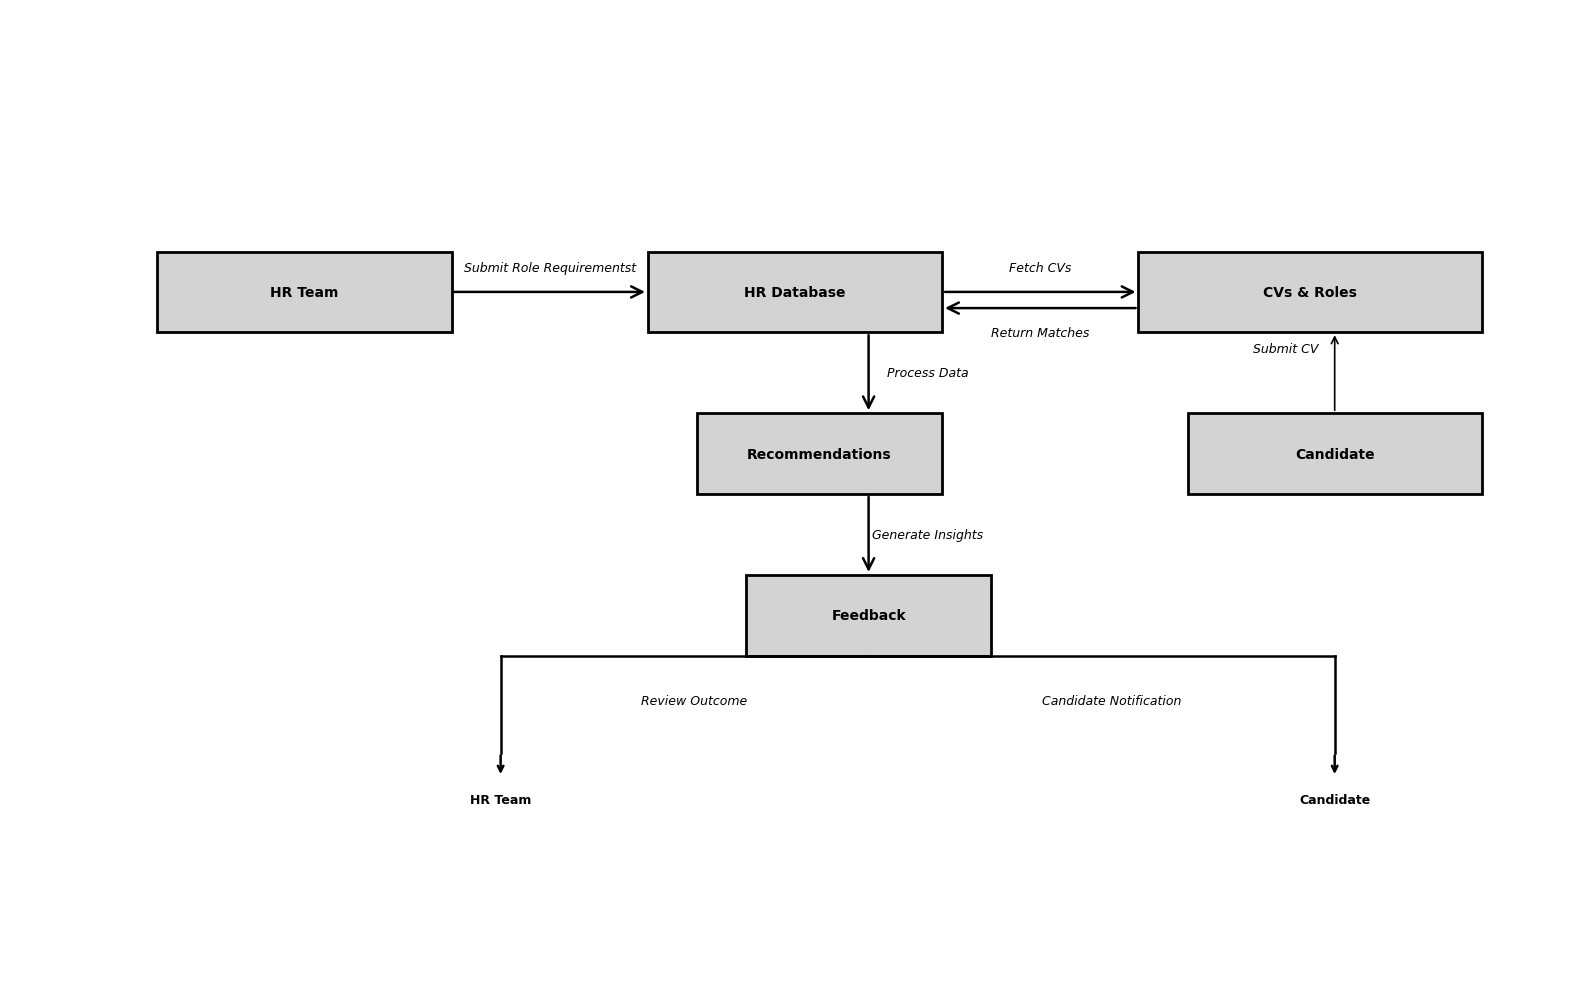

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 16)
ax.set_ylim(0, 12)
ax.axis('off')

# Draw a box with centered text
def draw_box(x, y, w, h, text):
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black', facecolor='lightgray')
    ax.add_patch(rect)
    ax.text(x + w / 2, y + h / 2, text, ha='center', va='center', fontsize=10, weight='bold')

# Draw straight arrows with optional labels
def draw_arrow(x1, y1, x2, y2, label=None, label_offset=(0, 0), linewidth=1.8, mutation_scale=20):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', linewidth=linewidth, mutation_scale=mutation_scale, color='black'))
    if label:
        lx = (x1 + x2) / 2 + label_offset[0]
        ly = (y1 + y2) / 2 + label_offset[1]
        ax.text(lx, ly, label, fontsize=9, ha='center', va='center', style='italic')

# Draw square (L-shaped) arrows with labels
def draw_square_arrow(x1, y1, x2, y2, corner1, corner2, label=None, label_offset=(0, 0)):
    ax.plot([x1, corner1[0]], [y1, corner1[1]], color='black', linewidth=1.8)
    ax.plot([corner1[0], corner2[0]], [corner1[1], corner2[1]], color='black', linewidth=1.8)
    ax.annotate('', xy=(x2, y2), xytext=(corner2[0], corner2[1]),
                arrowprops=dict(arrowstyle='->', linewidth=1.8, color='black'))
    if label:
        lx = (x1 + x2) / 2 + label_offset[0]
        ly = (y1 + y2) / 2 + label_offset[1]
        ax.text(lx, ly, label, fontsize=9, ha='center', va='center', style='italic')

# Boxes
draw_box(1.5, 8, 3, 1, "HR Team")
draw_box(6.5, 8, 3, 1, "HR Database")
draw_box(11.5, 8, 3.5, 1, "CVs & Roles")
draw_box(7, 6, 2.5, 1, "Recommendations")
draw_box(7.5, 4, 2.5, 1, "Feedback")
draw_box(12, 6, 3, 1, "Candidate")

# Straight arrows 
draw_arrow(4.5, 8.5, 6.5, 8.5, label="Submit Role Requirementst", label_offset=(0, 0.3))
draw_arrow(13.5, 7, 13.5, 8, label="Submit CV", label_offset=(-0.5, 0.3), linewidth=1.2, mutation_scale=12)
draw_arrow(9.5, 8.5, 11.5, 8.5, label="Fetch CVs", label_offset=(0, 0.3))
draw_arrow(11.5, 8.3, 9.5, 8.3, label="Return Matches", label_offset=(0, -0.3))
draw_arrow(8.75, 8, 8.75, 7, label="Process Data", label_offset=(0.6, 0))
draw_arrow(8.75, 6, 8.75, 5, label="Generate Insights", label_offset=(0.6, 0))



draw_square_arrow(8.75, 4, 5, 2.5,
                  corner1=(5, 4), corner2=(5, 2.8),
                  label="Review Outcome", label_offset=(0.1, 0.2))
ax.text(5, 2.3, "HR Team", ha='center', va='top', fontsize=9, weight='bold')


draw_square_arrow(8.75, 4, 13.5, 2.5,
                  corner1=(13.5, 4), corner2=(13.5, 2.8),
                  label="Candidate Notification", label_offset=(0.1, 0.2))
ax.text(13.5, 2.3, "Candidate", ha='center', va='top', fontsize=9, weight='bold')








# Finalize
plt.tight_layout()
plt.show()


### Final Recommendation
This notebook presents a complete pipeline for candidate-job matching and promotion eligibility prediction, including:

- Data Cleaning & Preprocessing: Text normalization and feature engineering to prepare clean inputs.

- Model Training: Implementing and evaluating multiple classification models (Random Forest, XGBoost, Logistic Regression) to predict promotion eligibility.

- Model Evaluation: Using classification metrics, confusion matrices, and ROC-AUC curves for comprehensive assessment.

- Visualization: ROC curve plotting for intuitive model performance comparison.

- Semantic Matching: Leveraging SentenceTransformer embeddings and cosine similarity to rank CV sections by relevance to job descriptions.

### Next Steps
- Enhance Data Quality: Explore additional preprocessing like handling missing data and feature interactions.

- Fine-tune Semantic Matching: Experiment with other embedding models or similarity metrics to improve candidate-job alignment.

- Interpretability: Apply explainability tools (e.g., SHAP, LIME) to understand model decisions and increase trust.

- Cross-Validation & Robustness: Validate findings on new datasets or with k-fold cross-validation for stronger generalization.

- Automation & Integration: Package the pipeline into a scalable application or dashboard for HR workflow integration.

- User Feedback Loop: Incorporate recruiter feedback to iteratively improve matching and predictions.



#### **Job Description Generating**

In [ ]:
import pandas as pd

# Define the updated job data
data = {
    "JobTitle": [
        "Accountant",
        "Business Analyst",
        "Project Manager",
        "HR Officer",
        "IT Support Specialist"
    ],
    "Description": [
        "Seeking an innovative and detail-oriented accountant with experience in hospital financial operations, auditing, payroll, and vendor management. Ideal candidate will have a background in accounting education, strong leadership skills, and proficiency in tools like Sage 50 and Microsoft Office.",
        "Hiring a business analyst experienced in requirements gathering, stakeholder communication, and process improvement.",
        "Hiring a project manager experienced with agile methodologies and team leadership.",
        "We need an HR officer skilled in recruitment, employee relations, and policy implementation.",
        "Looking for a technical support professional experienced in troubleshooting hardware, software, and network issues."
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("job_descriptions.csv", index=False)

